# Реализация линейных моделей для упрощения подбора коров для сельского хозяйства

## Введение

**Владельцу молочного хозяйства «Вольный луг» необходимо купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
     Задача: разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» предоставила подробные данные о своих коровах. Нужно создать две прогнозные модели для отбора бурёнок в поголовье:**
- `Первая будет прогнозировать возможный удой коровы (целевой признак Удой);`
- `Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).`

**С помощью модели нужно отобрать коров по двум критериям:**
- `средний удой за год — не менее 6000 килограммов;`
- `молоко должно быть вкусным.`

### Описание исходных данных

**Исходные данные представлены тремя датасетами:**
- `ferma_main.csv`
- `ferma_dad.csv`
- `cow_buy.csv`

**Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. 
Описание данных:**
- `id — уникальный идентификатор коровы.`
- `Удой, кг — масса молока, которую корова даёт в год (в килограммах).`
- `ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.`
- `Сырой протеин, г — содержание сырого протеина в корме (в граммах).`
- `СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.`
- `Порода — порода коровы.`
- `Тип пастбища — ландшафт лугов, на которых паслась корова.`
- `порода папы_быка — порода папы коровы.`
- `Жирность,% — содержание жиров в молоке (в процентах).`
- `Белок,% — содержание белков в молоке (в процентах).`
- `Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).`
- `Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).`

**Признаки в датасете `ferma_main.csv` можно разделить на группы.**
- `Характеристики коровы: id, Порода, порода папы_быка, Возраст.`
- `Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).`
- `Характеристика пастбища: Тип пастбища.`
- `Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.`

**Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:**
- `id — уникальный идентификатор коровы.`
- `Имя Папы — имя папы коровы.`

**Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:**
- `Порода — порода коровы.`
- `Тип пастбища — ландшафт лугов, на которых паслась корова.`
- `порода папы_быка — порода папы коровы.`
- `Имя_папы — имя папы коровы.`
- `Текущая_жирность,% — содержание жиров в молоке (в процентах).`
- `Текущий_уровень_белок,% — содержание белков в молоке (в процентах).`
- `Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).`
- `Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.`
- `Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.`
- `Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.`
**Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!**

## План исследования

**Работа будет проведена в следующей последовательности:**
- `Предобработка(Устранение пропусков, дубликатов, приведение столбцов исходных датасетов к правильным типам)`
- `Исследовательский анализ данных(оценка пригодности исходных данных для данного исследования)`
- `Подготовка данных к МО(Приведение количественных переменных в исходных данных к одному масштабу; Кодирования категориальных переменных)`
- `Обучение и настройка моделей(Выбор моделей для решения задач данного исследования, подбор наиболее эффективного порогового значения и т.д)`
- `Тестирование моделей на валидационных данных(вычисление метрик для оценки качества работы обученных моделей)`
- `Интерпритация моделей(Достаточно ли обученных моделей для выполнение поставленных задач? Что можно сделать для их улучшения)`

# Предобработка данных

## импортирование библиотек

In [1]:
!pip install phik
!pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

from phik import resources, report
from phik import phik_matrix

plt.rcParams["figure.figsize"] = (10, 10)

## Подгрузка и предварительная оценка исходных датасетов

In [3]:
try:
    df_ferma = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
    df_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
    df_cow = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')
# https://code.s3.yandex.net/datasets/
except:
    print('Не удается загрузить исходные данные')
    
display(df_ferma.head(10))
display(df_dad.head(10))
display(df_cow.head(10))

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


**Вывели общую информацию по исходным данным**

In [4]:
display(df_ferma.info())
display(df_dad.info())
display(df_cow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

## Обработка пропусков в исходных данных 

**Из оценки общей информации по исходным данным видно, что во втором датасете отсутствуют строчки с именами отцов 5 коров. Также было бы рационально объединить первый и второй датасет Т.к восстановить пропущенные данные не представляется возможным, добавили во второй датасет 5 строк с недостающими id и значениями `Не известен` во втором столбце. После этого датасеты `df_ferma` и `df_dad` объединили**

In [5]:
# Проверка пропусков в столбце 'Имя Папы'
missing_dad_ids = df_ferma[~df_ferma['id'].isin(df_dad['id'])]['id']
display(f"Пропущенные идентификаторы в df_dad: {missing_dad_ids.tolist()}")

# Добавление строк с недостающими id и значением 'Не известен' для 'Имя Папы'
for missing_id in missing_dad_ids:
    df_dad = df_dad.append({'id': missing_id, 'Имя Папы': 'Не известен'}, ignore_index=True)

# Проверка после добавления
display(f"Размерность df_dad после добавления строк: {df_dad.shape}")

'Пропущенные идентификаторы в df_dad: []'

'Размерность df_dad после добавления строк: (629, 2)'

In [6]:
# Объединение датасетов по столбцу 'id'
df_ferma_combined = pd.merge(df_ferma, df_dad, on='id', how='left')
display(df_ferma_combined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

## Изменение названий стобцов

**Изменили названия столбцов на более подходящие**

In [7]:
df_ferma_combined.rename(columns={
    'id': 'id',
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'eke',
    'Сырой протеин, г': 'crude_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'spo',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Жирность,%': 'fat_content',
    'Белок,%': 'protein_content',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age',
    'Имя Папы': 'father_name'
}, inplace=True)

# Проверим результат
display(df_ferma_combined.columns)

Index(['id', 'milk_yield_kg', 'eke', 'crude_protein_g', 'spo', 'breed',
       'pasture_type', 'father_breed', 'fat_content', 'protein_content',
       'milk_taste', 'age', 'father_name'],
      dtype='object')

In [8]:
df_cow.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%': 'current_fat_content',
    'Текущий_уровень_белок,%': 'current_protein_content',
    'Возраст': 'age'
}, inplace=True)

# Проверим результат
display(df_cow.columns)

Index(['breed', 'pasture_type', 'father_breed', 'father_name',
       'current_fat_content', 'current_protein_content', 'age'],
      dtype='object')

## Обработка дубликатов

**Вывели описательную статистику по исходных данным**

In [9]:
display(df_cow.describe())
display(df_ferma_combined.describe())

,breed,pasture_type,father_breed,father_name,current_fat_content,current_protein_content,age
count,20,20,20,20,20,20,20
unique,2,2,2,4,12,12,2
top,РефлешнСоверинг,равнинное,Соверин,Буйный,"3,59","3,074",более_2_лет
freq,11,11,12,8,3,5,15


,id,milk_yield_kg,crude_protein_g
count,634.000000,634.000000,634.000000
mean,317.460568,6187.025237,1922.682965
std,183.096982,1638.401021,182.392548
min,1.000000,5204.000000,1660.000000
25%,159.250000,5751.750000,1772.250000
50%,317.500000,6130.500000,1880.500000
75%,475.750000,6501.000000,2058.750000
max,629.000000,45616.000000,2349.000000


### Вывод по статистическим данным

#### Категориальные признаки:

- `Порода коровы (breed)` **и** `тип пастбища (pasture_type)` **встречаются в выборке равномерно, по 8 записей для каждой из двух категорий. Наиболее частая порода —** `РефлешнСоверинг`**, а тип пастбища — `равнинное`.**

- **`Порода отца (father_breed)` имеет дисбаланс — 10 коров с отцом породы `Соверин` против 6 с другой породой. Это может влиять на распределение других характеристик, таких как удой и качество молока.**

- **`Имя отца (father_name)` также имеет разброс, наиболее часто встречается имя `Буйный` (7 раз), что может быть связано с его генетическим вкладом в потомство.**

- **`Текущая жирность (current_fat_content)` и `текущее содержание белка (current_protein_content)` имеют множество уникальных значений (по 12 категорий), что указывает на разнообразие в этих показателях у коров.**

- **`Возраст (age)` показывает дисбаланс: большинство коров (11 из 16) старше двух лет. Это может объяснять зависимость удоя от возраста, выявленную в ходе исследования.**

#### Количественные признаки:

- **`Удой молока (milk_yield_kg)` показывает средний уровень около 6189 кг с разбросом в 1645 кг. Диапазон от 5204 кг до 45616 кг говорит о том, что есть несколько коров с очень высоким удоем, что требует более детального анализа для выявления факторов, способствующих такому результату.**

- **`Содержание сырого белка (crude_protein_g)` варьируется от 1660 до 2349 г, с средним значением около 1923 г. Этот показатель указывает на достаточно стабильное содержание белка, хотя есть небольшие выбросы, которые могут быть связаны с особенностями питания или породой.**

- **Эти данные дают понимание о структуре и вариациях в выборке. Статистическое распределение показателей, таких как возраст, удой и содержание белка, предполагает, что определённые группы коров могут иметь более выраженное влияние на общие результаты, и это должно учитываться при дальнейшем моделировании и анализе.**


In [10]:
display(df_ferma_combined.duplicated().sum())
display(df_cow.duplicated().sum())

5

4

**В исходных данных были обнаружены явные дубликаты. Удалять их в данном случае нельзя, т.к они будут полезны при обучении моделей. Оставили явные дубликаты**

In [11]:
display(df_ferma_combined.shape)
display(df_cow.shape)

(634, 13)

(20, 7)

## Удаление неявных дубликатов

**Вывели уникальные значения в категориальньх столбцах**

In [12]:
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age', 'milk_taste']

# Графики для категориальных признаков
for column in categorical_columns:
    display(df_ferma_combined[column].unique())

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

array(['более_2_лет', 'менее_2_лет'], dtype=object)

array(['вкусно', 'не вкусно'], dtype=object)

**Из выведенных данных видно, что в столбцах `тип пастбища` и `порода папы_быка` присутствуют неявные дубликать. Избавились от них**

In [13]:
df_ferma_combined['pasture_type'] = df_ferma_combined['pasture_type'].replace({
    'Равнинные': 'Равнинное'  # Пример замены различных вариантов на единый
})  

df_ferma_combined['father_breed'] = df_ferma_combined['father_breed'].replace({
    'Айдиалл': 'Айдиал' # Пример замены различных вариантов на единый
})

display(df_ferma_combined['pasture_type'].unique())
display(df_ferma_combined['father_breed'].unique())

array(['Равнинное', 'Холмистое'], dtype=object)

array(['Айдиал', 'Соверин'], dtype=object)

## Изменение типов данных 

**Некоторые столбцы в исходных датасетах имеют неправильный тип данных. Поэтому изменили типы данных в этих столбцах**

**В ходе изучения исходных данных оказалось, что в количественных столбцах вместо точек стоят запятые, из-за чего при попытке изменить тип данных со строкового на числовой появляется ошибка. Для решения этой проблемы заменили запятые точками**

In [14]:
# Проверка и замена запятых на точки в нужных столбцах
numeric_columns = ['eke', 'crude_protein_g', 'spo', 'milk_yield_kg', 'fat_content', 
                   'protein_content', 'current_fat_content', 'current_protein_content']

for column in numeric_columns:
    if column in df_ferma_combined.columns:
        # Замена запятых на точки и удаление лишних пробелов
        df_ferma_combined[column] = df_ferma_combined[column].astype(str).str.replace(',', '.').str.strip()
        
        # Преобразование столбца в тип float
        try:
            df_ferma_combined[column] = df_ferma_combined[column].astype(float)
        except ValueError as e:
            display(f"Ошибка преобразования в столбце {column}: {e}")

# Проверка типов данных после преобразования
display(df_ferma_combined.dtypes)

id                   int64
milk_yield_kg      float64
eke                float64
crude_protein_g    float64
spo                float64
breed               object
pasture_type        object
father_breed        object
fat_content        float64
protein_content    float64
milk_taste          object
age                 object
father_name         object
dtype: object

In [15]:
# Проверка и замена запятых на точки в нужных столбцах
numeric_columns = ['current_fat_content', 'current_protein_content']

for column in numeric_columns:
    if column in df_cow.columns:
        # Замена запятых на точки и удаление лишних пробелов
        df_cow[column] = df_cow[column].astype(str).str.replace(',', '.').str.strip()
        
        # Преобразование столбца в тип float
        try:
            df_cow[column] = df_cow[column].astype(float)
        except ValueError as e:
            display(f"Ошибка преобразования в столбце {column}: {e}")

# Проверка типов данных после преобразования
display(df_cow.dtypes)

breed                       object
pasture_type                object
father_breed                object
father_name                 object
current_fat_content        float64
current_protein_content    float64
age                         object
dtype: object

In [16]:
# Приведение типов данных в df_ferma
df_ferma_combined = df_ferma_combined.astype({
    'id': 'object',  # уникальный идентификатор как строка
    'milk_yield_kg': 'float',  # числовой, в килограммах
    'eke': 'float',  # числовой
    'crude_protein_g': 'float',  # числовой
    'spo': 'float',  # числовой
    'breed': 'category',  # категориальный
    'pasture_type': 'category',  # категориальный
    'father_breed': 'category',  # категориальный
    'fat_content': 'float',  # числовой, в процентах
    'protein_content': 'float',  # числовой, в процентах
    'milk_taste': 'category',  # категориальный, бинарный признак
    'age': 'category',
    'father_name': 'object' # категориальный, бинарный признак
})

# Приведение типов данных для категориальных и строковых признаков
df_cow = df_cow.astype({
    'breed': 'category',                 # Категориальный признак
    'pasture_type': 'category',           # Категориальный признак
    'father_breed': 'category',       # Категориальный признак
    'father_name': 'object',                 # Строковый признак (или можно использовать 'category')
    'age': 'category',
    'current_fat_content' : 'float64',
    'current_protein_content' : 'float64'      # Категориальный бинарный признак
})


# Проверка типов данных после приведения
display(df_ferma_combined.dtypes)
display(df_cow.dtypes)

id                   object
milk_yield_kg       float64
eke                 float64
crude_protein_g     float64
spo                 float64
breed              category
pasture_type       category
father_breed       category
fat_content         float64
protein_content     float64
milk_taste         category
age                category
father_name          object
dtype: object

breed                      category
pasture_type               category
father_breed               category
father_name                  object
current_fat_content         float64
current_protein_content     float64
age                        category
dtype: object

## Вывод

**Исходные данные после предобработки пригодны для дальнейшего иследования. В них отсутствуют пропуски и дубликаты, столбцы имеют правильные типы данных**

# Исследовательский анализ данных

**Учитывая, что для новых коров планируется увеличить параметры кормов на 5%, необходимо создать дополнительные столбцы в `df_cow`**

In [17]:
df_cow['eke'] = df_ferma_combined['eke'] * 1.05
df_cow['crude_protein_g'] = df_ferma_combined['crude_protein_g'] * 1.05
df_cow['spo'] = df_ferma_combined['spo'] * 1.05

display(df_cow.head(5))

,breed,pasture_type,father_breed,father_name,current_fat_content,current_protein_content,age,eke,crude_protein_g,spo
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,14.91,1830.15,0.93450
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,13.44,2244.90,0.93450
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,14.70,1946.70,0.92925
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,13.02,2112.60,0.92925
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,13.44,1758.75,0.92925


**Вывели статистические данные по исходным датасетам**

**Для датасета  `df_ferma_combined`**

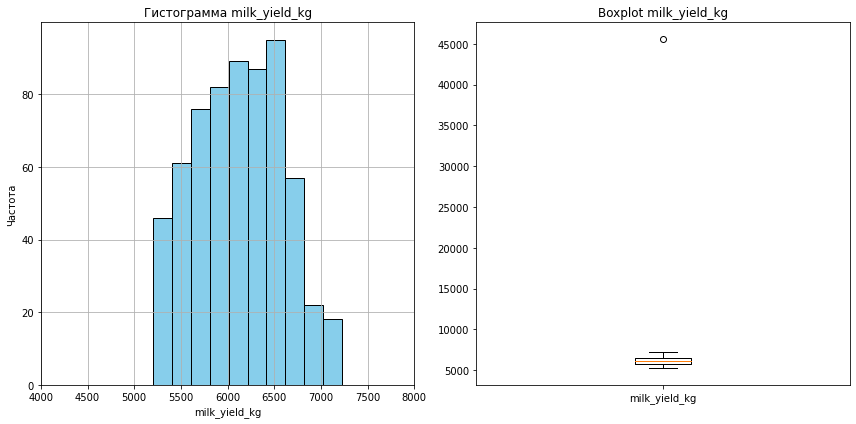

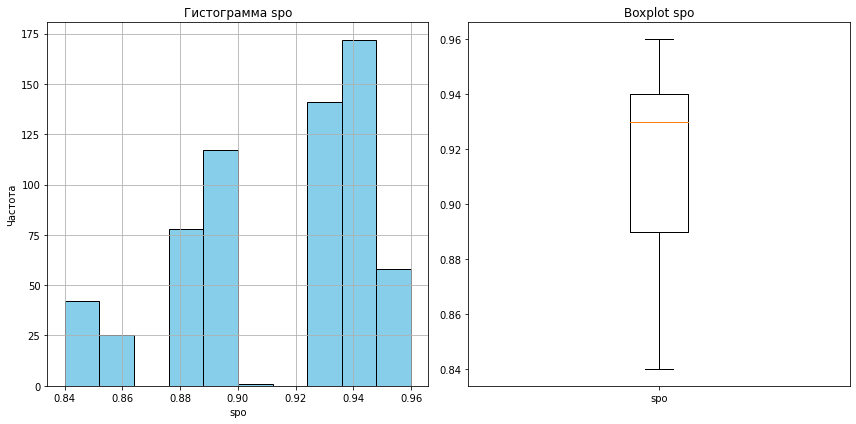

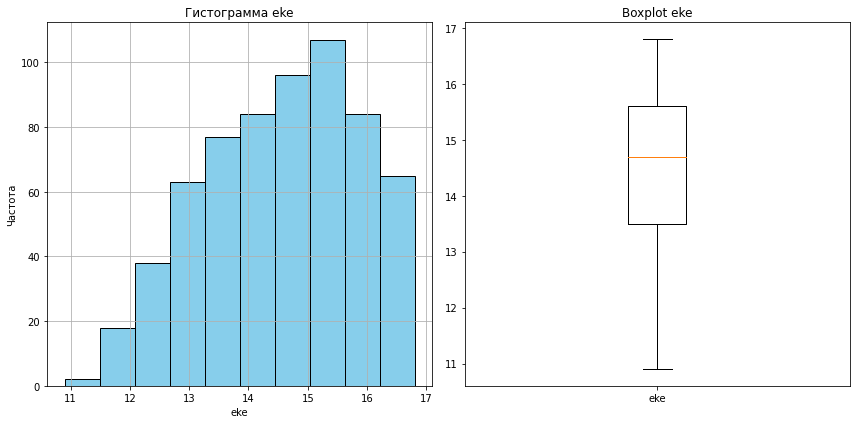

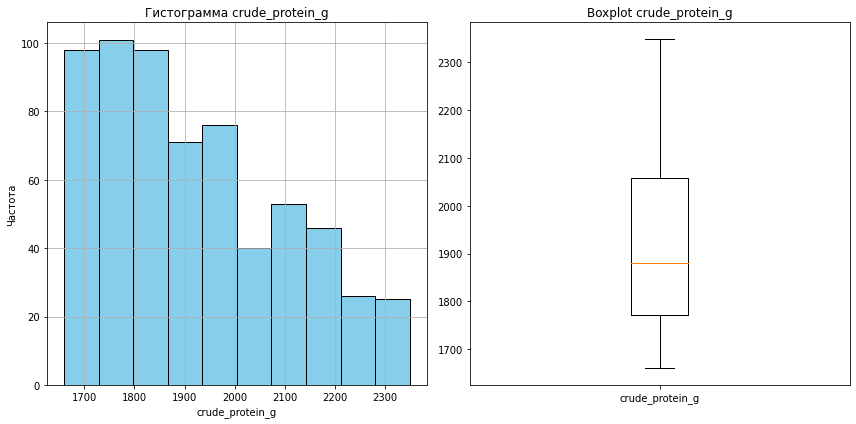

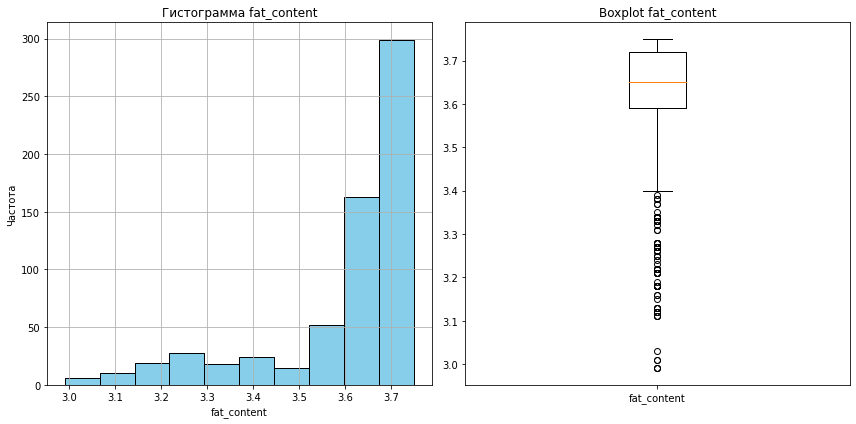

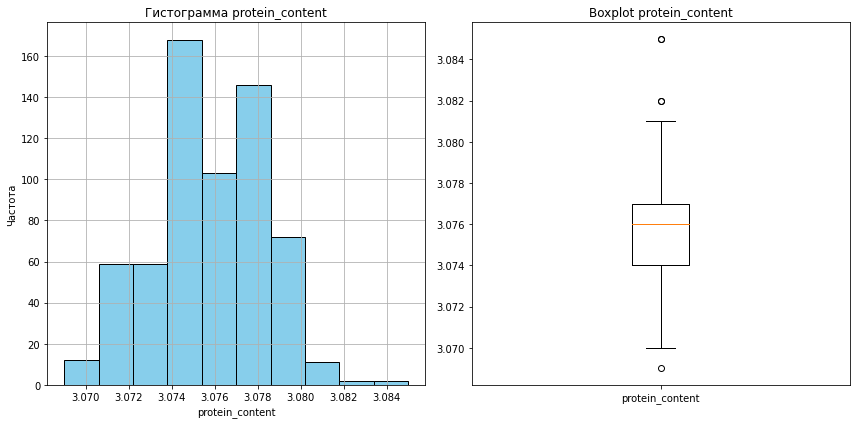

In [18]:
# Гистограммы для числовых признаков
numerical_columns = ['milk_yield_kg', 'spo', 'eke', 'crude_protein_g', 'fat_content', 'protein_content']

for num_col in numerical_columns:
    plt.figure(figsize=(12, 6))  # Размер общей фигуры для гистограммы и графика с усами

    # 1. Гистограмма
    plt.subplot(1, 2, 1)  # Первая из двух графиков (1 строка, 2 колонки, первый график)
    if num_col == 'milk_yield_kg':
        df_ferma_combined[num_col].hist(bins=200, color='skyblue', edgecolor='black')  # Гистограмма с 200 интервалами
        plt.xlim(4000, 8000)  # Пределы оси X от 0 до 5000
    else:
        df_ferma_combined[num_col].hist(bins=10, color='skyblue', edgecolor='black')  # Гистограмма для остальных признаков
    
    plt.title(f"Гистограмма {num_col}")
    plt.xlabel(num_col)
    plt.ylabel("Частота")

    # 2. Boxplot (график с усами)
    plt.subplot(1, 2, 2)  # Вторая из двух графиков (1 строка, 2 колонки, второй график)
    plt.boxplot(df_ferma_combined[num_col]) 
    plt.title(f"Boxplot {num_col}")
    plt.xticks([1], [num_col])  # Установка метки оси X
    
    # Показать оба графика на одной фигуре
    plt.tight_layout()  # Для компактного размещения графиков
    plt.show()

**Удалили аномальное значение 45616 в столбце `удой`(Можно было бы подумать, что настоящее значение 4561.6, но оно тоже было бы артифактом)**

(4000.0, 8000.0)

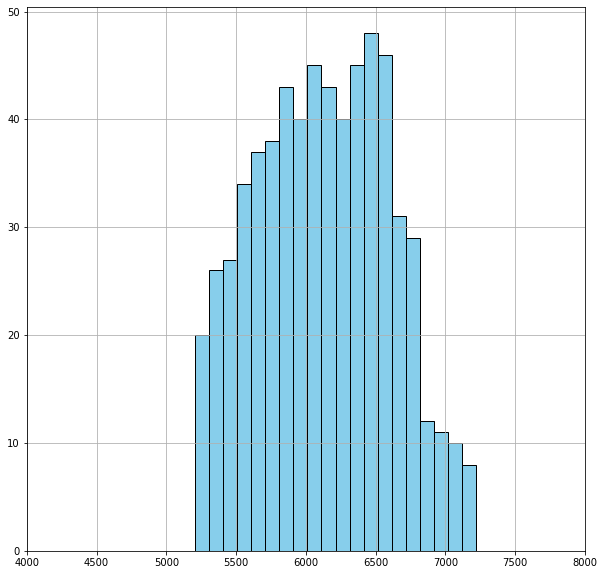

In [19]:
df_ferma_combined.query('milk_yield_kg < 45000', inplace=True)

df_ferma_combined['milk_yield_kg'].hist(bins=20, color='skyblue', edgecolor='black')  # Гистограмма с 200 интервалами
plt.xlim(4000, 8000)  # Пределы оси X от 0 до 5000

**После удаления артифакта гистограмма для столбца `удой` стала выглядеть более реально**

**Из построенных графиков видно, что признаки `СПО` и `жирность` стоит перевести в категориальные**

**Признак `СПО` разделили на категории: Низкое - < 0.86, Среднее от 0,87 до 0.91 и Высокое > 0.92**

In [20]:
# Создание категорий на основе значений столбца СПО
df_ferma_combined['spo'] = pd.cut(df_ferma_combined['spo'],
                                           bins=[-float('inf'), 0.86, 0.91, float('inf')],
                                           labels=['Низкое', 'Среднее', 'Высокое'])
df_cow['spo'] = pd.cut(df_cow['spo'], bins=[-float('inf'), 0.86, 0.91, float('inf')],
                                    labels=['Низкое', 'Среднее', 'Высокое'])
# Проверим результат
display(df_ferma_combined['spo'].head())
display(df_cow['spo'].head())

0    Среднее
1    Среднее
2    Среднее
3    Среднее
4    Среднее
Name: spo, dtype: category
Categories (3, object): ['Низкое' < 'Среднее' < 'Высокое']

0    Высокое
1    Высокое
2    Высокое
3    Высокое
4    Высокое
Name: spo, dtype: category
Categories (3, object): ['Низкое' < 'Среднее' < 'Высокое']

**Аналогично постутили с признаком `жирность`**

In [21]:
# Создание категорий на основе значений столбца СПО
df_ferma_combined['fat_content'] = pd.cut(df_ferma_combined['fat_content'],
                                           bins=[-float('inf'), 3.5, 3.7, float('inf')],
                                           labels=['Низкое', 'Среднее', 'Высокое'])

# Проверим результат
display(df_ferma_combined['fat_content'].head())

0    Среднее
1    Среднее
2    Среднее
3     Низкое
4    Высокое
Name: fat_content, dtype: category
Categories (3, object): ['Низкое' < 'Среднее' < 'Высокое']

In [22]:
# Создание категорий на основе значений столбца СПО
df_cow['current_fat_content'] = pd.cut(df_cow['current_fat_content'],
                                           bins=[-float('inf'), 3.5, 3.7, float('inf')],
                                           labels=['Низкое', 'Среднее', 'Высокое'])

# Проверим результат
display(df_cow['current_fat_content'].head())

0    Среднее
1    Среднее
2    Среднее
3     Низкое
4    Среднее
Name: current_fat_content, dtype: category
Categories (3, object): ['Низкое' < 'Среднее' < 'Высокое']

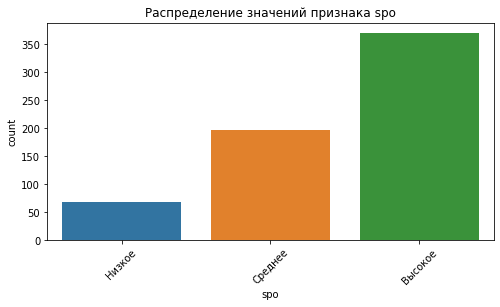

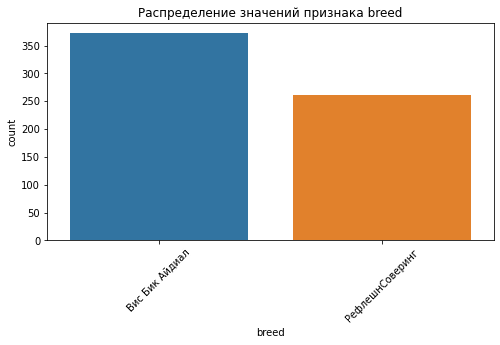

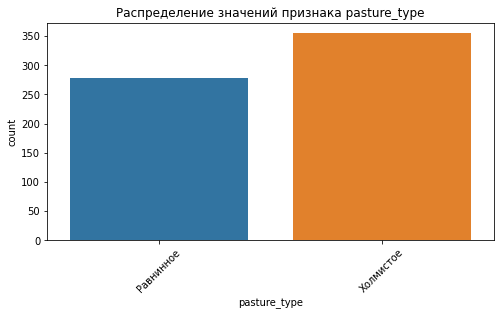

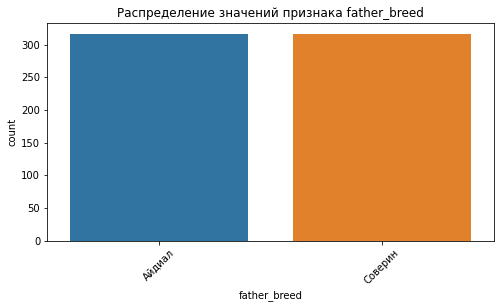

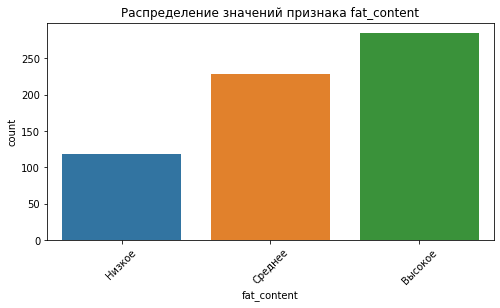

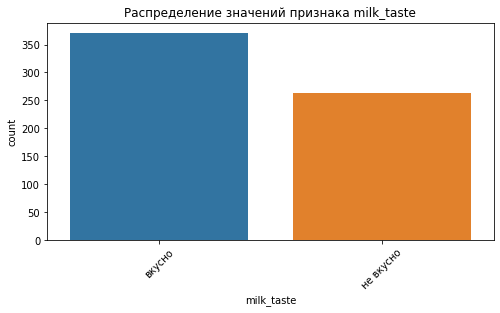

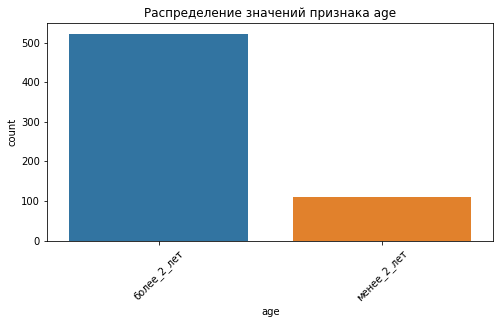

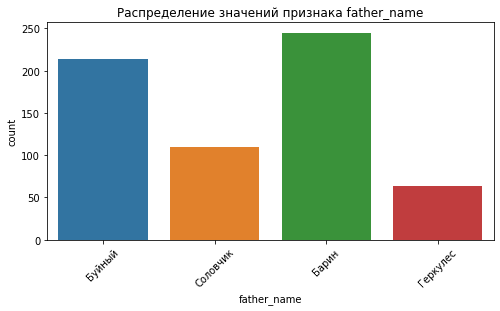

In [23]:
#Анализ категориальных признаков
categorical_columns = df_ferma_combined.select_dtypes(include=['object', 'category']).columns.tolist()
if 'id' in categorical_columns:
    categorical_columns.remove('id')


# Графики для категориальных признаков
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df_ferma_combined)
    plt.title(f"Распределение значений признака {column}")
    plt.xticks(rotation=45)
    plt.show()

**В результате изучения графиков сделали предположение о наличии в целевой переменной(таргете). При дисбалансе классов традиционные метрики, такие как accuracy (точность), могут быть обманчивыми. Например, модель может предсказывать большинство (частый класс) и получать высокую точность, но при этом плохо распознавать редкий класс, что недопустимо в бизнес-задаче.** 

**В задачах с дисбалансом классов необходимо использовать метрики, которые учитывают оба класса, такие как:**
- **`Precision (точность)`: важна, если ошибка в виде ложного срабатывания `false positive` критична. Например, фермер ошибочно купит корову с невкусным молоком.**
- **`Recall (полнота)`: важна, если критично не пропустить положительный класс (в данном случае `вкусное молоко`). Это более важно в вашей задаче, чтобы фермер не купил корову с "невкусным" молоком.**

**По построенным гистограммам и графикам с усами видно, что распределения количественных данных вполне напоминают нормальные. По диаграмме для столбца удой видно одно значение 45000 кг, тогда, как остальные значения находятся в диапазоне от 0 до 10000 кг. Можно было бы подумать, что это не 45616, а 4500 кг, однако, это всеравно будет выброс. Поэтому исключили это значение. В остальных столбцах выбросов много, однако они не выглядят артифактами.(3 - 4% для таких столбцов, как ЭКЕ являются абсолютно нормальными)**

<AxesSubplot:>

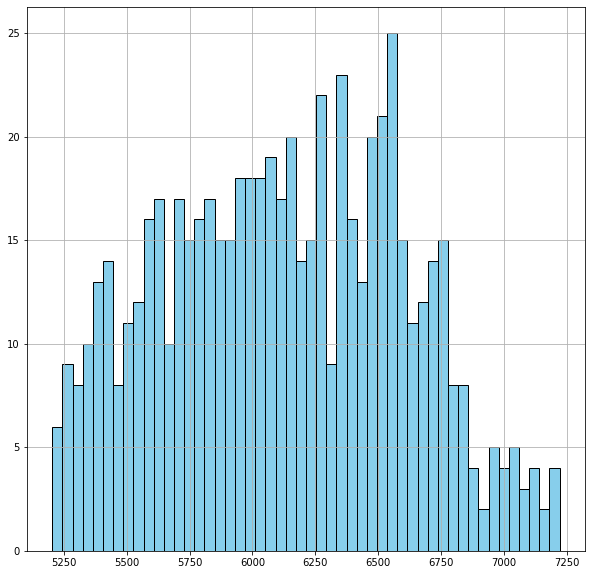

In [24]:
df_ferma_combined = df_ferma_combined.loc[df_ferma_combined['milk_yield_kg'] < 10000]

df_ferma_combined['milk_yield_kg'].hist(bins=50, color='skyblue', edgecolor='black')


**Теперь данные выглядят логично**

**Данные по категориальным столбцам выглядят вполне правильными**

**Вывели те же данные и для второго датасета**

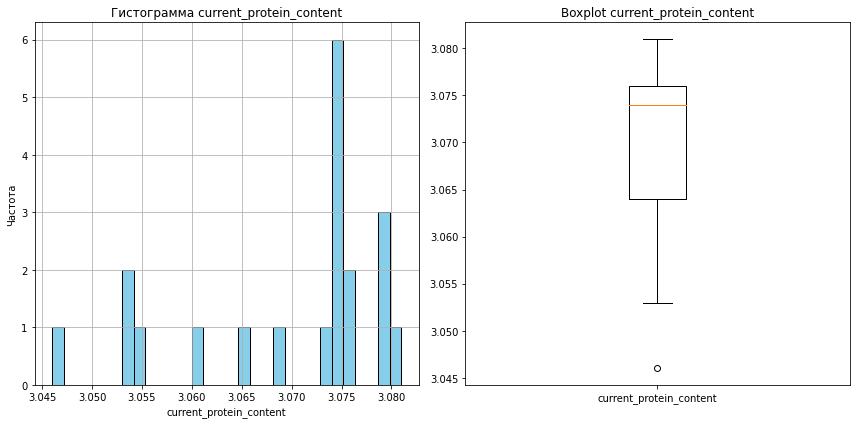

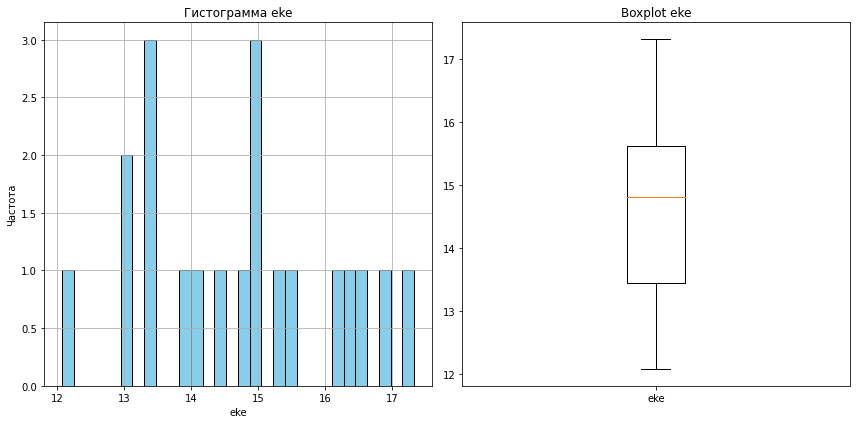

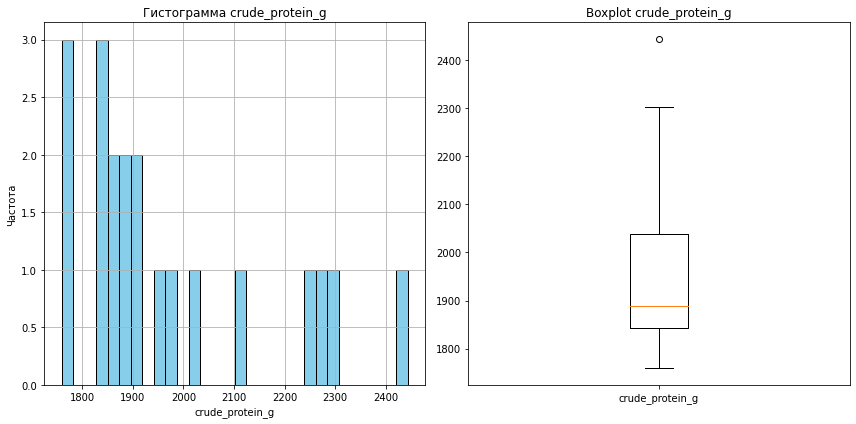

In [25]:
# Гистограммы для числовых признаков
numerical_columns = df_cow.select_dtypes(include=['int64', 'float64']).columns.tolist()

for num_col in numerical_columns:
    plt.figure(figsize=(12, 6))  # Размер общей фигуры для гистограммы и графика с усами

    # 1. Гистограмма
    plt.subplot(1, 2, 1)  # Первая из двух графиков (1 строка, 2 колонки, первый график)
    if num_col == 'Удой, кг':
        df_cow[num_col].hist(bins=200, color='skyblue', edgecolor='black')  # Гистограмма с 200 интервалами
        plt.xlim(4000, 8000)  # Пределы оси X от 0 до 5000
    else:
        df_cow[num_col].hist(bins=30, color='skyblue', edgecolor='black')  # Гистограмма для остальных признаков
    
    plt.title(f"Гистограмма {num_col}")
    plt.xlabel(num_col)
    plt.ylabel("Частота")

    # 2. Boxplot (график с усами)
    plt.subplot(1, 2, 2)  # Вторая из двух графиков (1 строка, 2 колонки, второй график)
    plt.boxplot(df_cow[num_col]) 
    plt.title(f"Boxplot {num_col}")
    plt.xticks([1], [num_col])  # Установка метки оси X
    
    # Показать оба графика на одной фигуре
    plt.tight_layout()  # Для компактного размещения графиков
    plt.show()

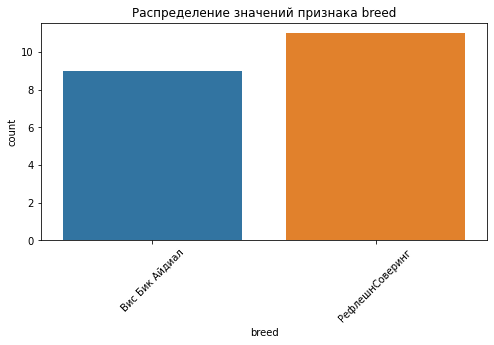

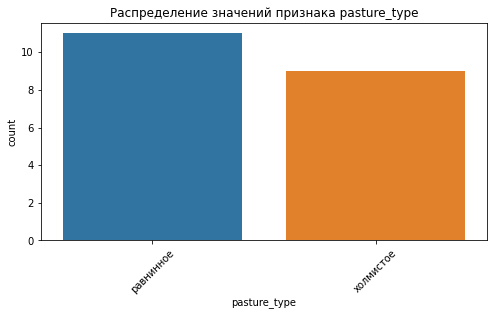

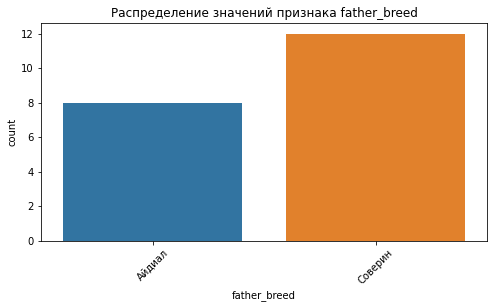

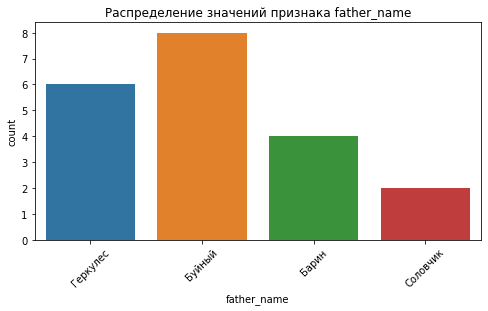

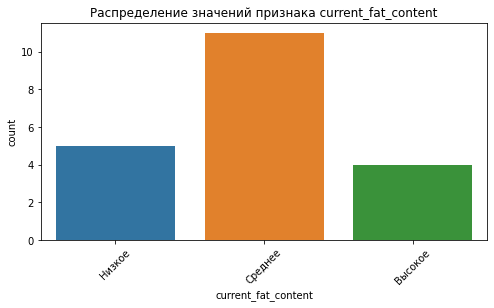

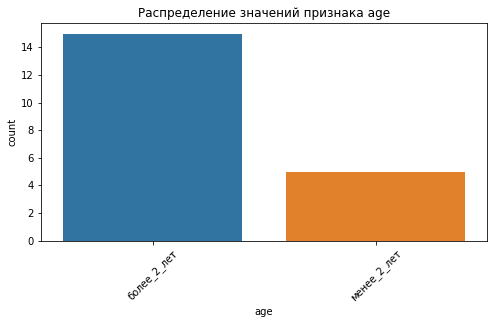

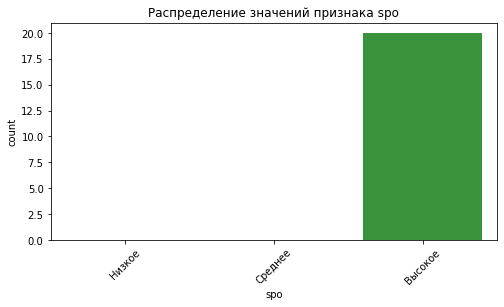

In [26]:
#Анализ категориальных признаков
categorical_columns = df_cow.select_dtypes(include=['object', 'category']).columns.tolist()

# Графики для категориальных признаков
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df_cow)
    plt.title(f"Распределение значений признака {column}")
    plt.xticks(rotation=45)
    plt.show()

**Графики для таблицы `df_cow` выглядят довольно правдоподобно**

## Выводы по гистограммам и боксплотам

#### Бимодальность данных:

- **На гистограммах по количественным признакам, особенно по удою, заметна `бимодальность` — наличие двух пиков в распределении данных. Это указывает на наличие двух подгрупп в данных, которые могут соответствовать разным характеристикам животных или условий содержания. Прежде чем делать выводы или строить модели, стоит углубиться в анализ этих подгрупп, чтобы понять природу различий и разделить данные для более корректного анализа.**

#### Наличие супервыброса по удою:

- **На `ящиках с усами` (боксплотах) заметен супервыброс по удою — одно или несколько экстремальных значений сильно выделяются на фоне других данных. Хотя на этом этапе можно считать остальные выбросы приемлемыми, этот экстремум может негативно влиять на будущие модели. Приняли наиболее рациональное решение - удалить артифакт**

#### Признаки СПО и жирность:

- **По признакам `СПО (содержание сухого обезжиренного остатка)` и `жирность` наблюдается значительная асимметрия распределения. Это может свидетельствовать о наличии нескольких групп, скрытых в данных. Перевод этих признаков в категориальную шкалу (например, "низкое", "среднее", "высокое" значение) должен улучшить качество анализа, поскольку модели могут лучше различать группы с разными уровнями этих признаков. Поэтому перевели `СПО` и `жирность` в категориальные переменные.**

**Учитывая бимодальность данных, в дальнейшем анализе можно попробовать сегментировать данные на подгруппы для более точного понимания структуры.
Пропала необходимость следить за влиянием супервыбросов на модели, особенно в задачах регрессии, и при необходимости проводить их обработку.
Перевод признаков с явной асимметрией в категориальные шкалы поможет улучшить интерпретацию данных и повысить качество моделей.**

# Корреляционный анализ признаков в датасете

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Спасибо, почитал про эту библиотеку. Попробую применять ее в дальнейших проэктах 

**Построили матрицу корреляции зависимости целевого признака `удой кг` от входных признаков**

In [27]:
colors = ["lightblue", "yellow", "red"]  # Можно выбрать любые подходящие цвета
bounds = [0.3, 0.5, 0.7, 1.0]  # Границы для корреляции
cmap = ListedColormap(colors)
norm = plt.Normalize(vmin=0.3, vmax=1.0)

# Функция для отображения корреляционной матрицы
def plot_custom_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    
    # Маска для значений ниже 0.3, чтобы их не отображать
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, annot=True, cmap=cmap, norm=norm, mask=mask, cbar=True, 
                cbar_kws={'boundaries': bounds, 'ticks': bounds}, fmt='.2f')

    plt.title(title)
    plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable milk_taste for analysis 1. Dropping this column
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable milk_taste for analysis 1. Dropping this column
  warnings.warn(


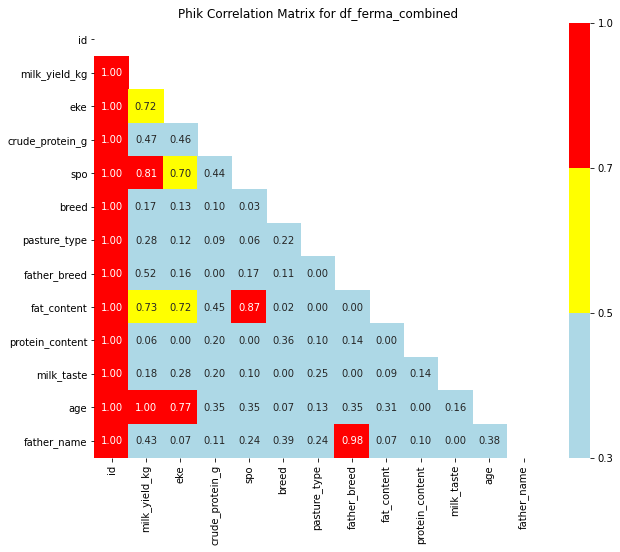

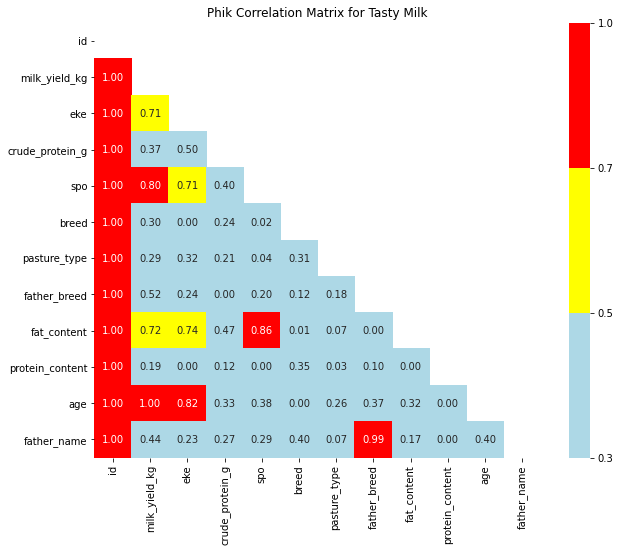

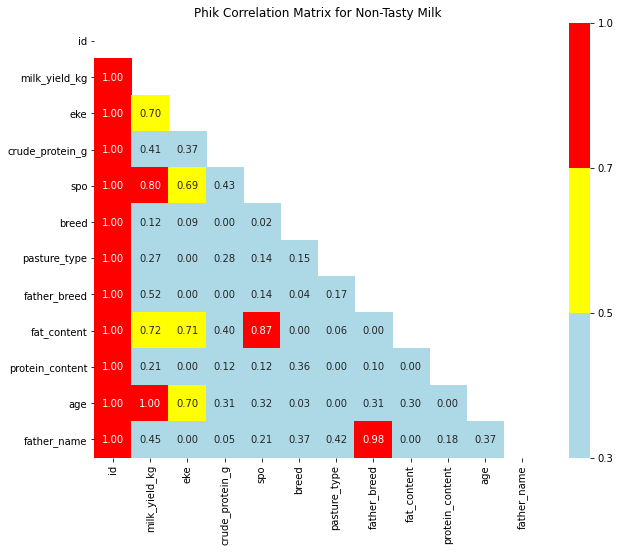

In [28]:
# Создаем экземпляр кодировщика
le = LabelEncoder()

# Применяем кодировщик к колонке 'milk_taste'
df_ferma_combined['milk_taste'] = le.fit_transform(df_ferma_combined['milk_taste'])

# Разделение данных на два класса по целевой переменной
df_tasty_milk = df_ferma_combined[df_ferma_combined['milk_taste'] == 1]  # Вкусное молоко
df_non_tasty_milk = df_ferma_combined[df_ferma_combined['milk_taste'] == 0]  # Невкусное молоко

# Рассчитаем корреляции для df_ferma_combined
corr_phik_ferma = df_ferma_combined.phik_matrix(interval_cols=['milk_yield_kg', 'eke', 'crude_protein_g', 'protein_content'])

# Рассчитаем корреляции для вкусного молока и невкусного молока
corr_phik_tasty = df_tasty_milk.phik_matrix(interval_cols=['milk_yield_kg', 'eke', 'crude_protein_g', 'protein_content'])
corr_phik_non_tasty = df_non_tasty_milk.phik_matrix(interval_cols=['milk_yield_kg', 'eke', 'crude_protein_g', 'protein_content'])

# Построение тепловой карты для df_ferma_combined
plot_custom_heatmap(corr_phik_ferma, "Phik Correlation Matrix for df_ferma_combined")

# Построение тепловой карты для вкусного молока
plot_custom_heatmap(corr_phik_tasty, "Phik Correlation Matrix for Tasty Milk")

# Построение тепловой карты для невкусного молока
plot_custom_heatmap(corr_phik_non_tasty, "Phik Correlation Matrix for Non-Tasty Milk")

**Для построения матрицы корреляции использовали библиотеку `phik`, коэффициент Пирса в данном случае не подходит(т.к не дает учитывать корреляцию ключевого признака с категориальными признаками, а также дает некорректные результаты в случае, если между признаками присутствует нелинейная связь). Из нее видно, что `удой` имеет сильную зависимость с признаками: `ЭКЕ`, `СПО` и `Жирность` и `возраст`(с этим признаком корреляция максимальна). С остальными признаками нет практически никакой корреляции. Однако входной признак `Жирность` имеет средней степени корреляцию(вполне возможно, нелинейную) с признаками: `СПО` и `ЭКЕ`, не имеющими между собой никакой зависимости. Воизбежание проблем в работе модели исключили этот признак из числа входных. В остальном, проблем, связанных с корреляциями, способных сильно повлиять на качество работы модели нет.**

**Построили диаграммы рассеяния для признака Удой, кг и всех входных признаков с учётом значения категориальных признаков**

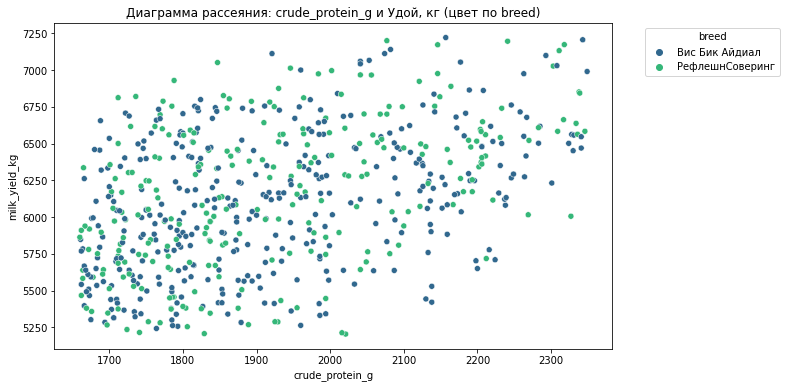

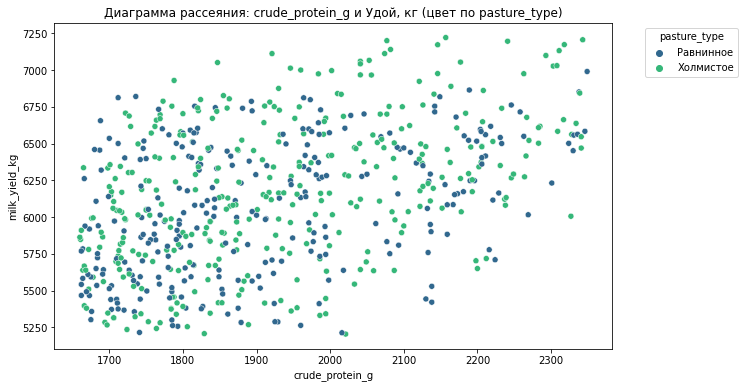

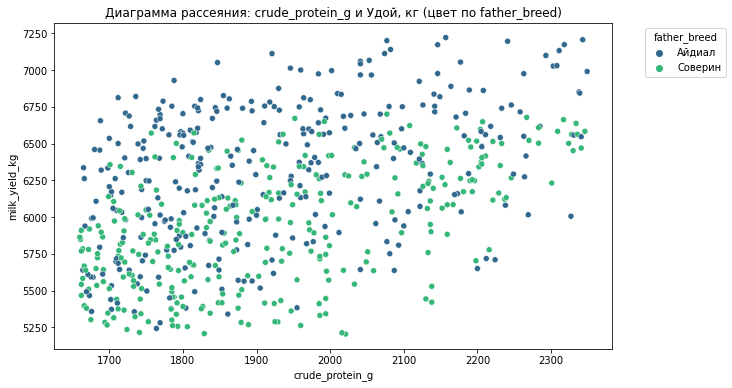

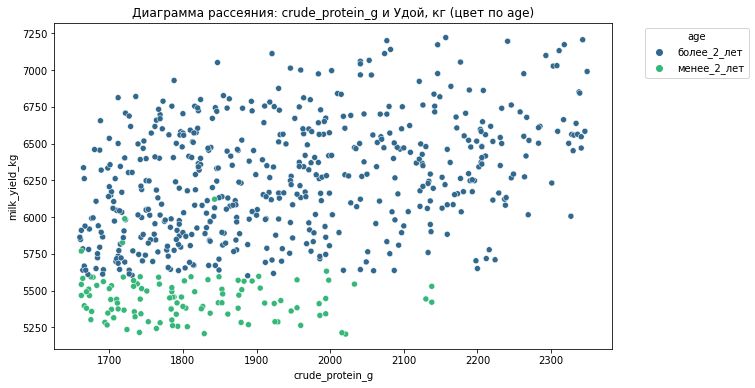

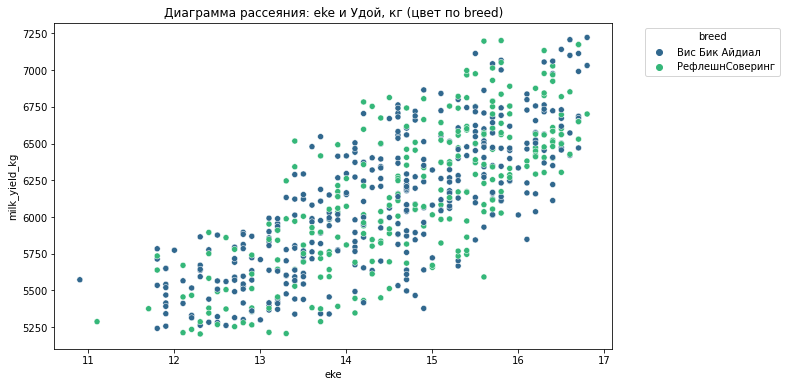

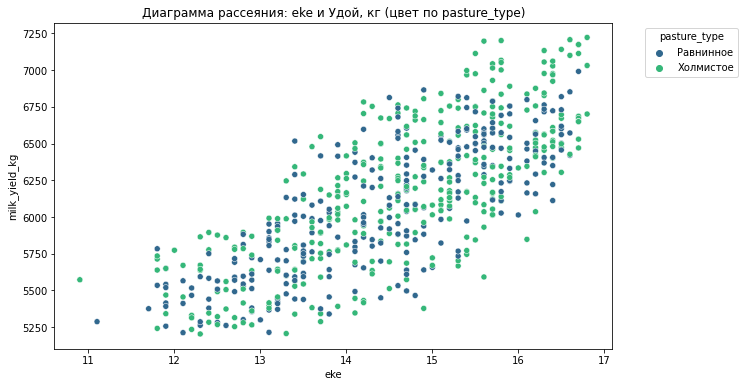

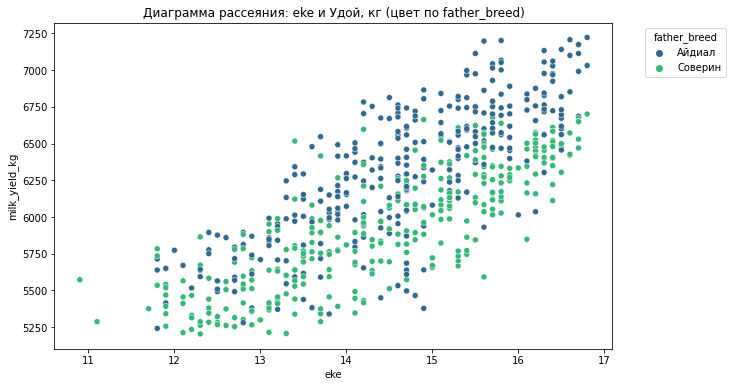

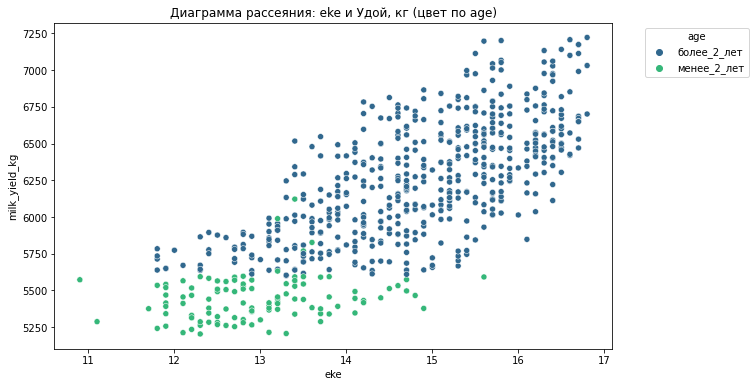

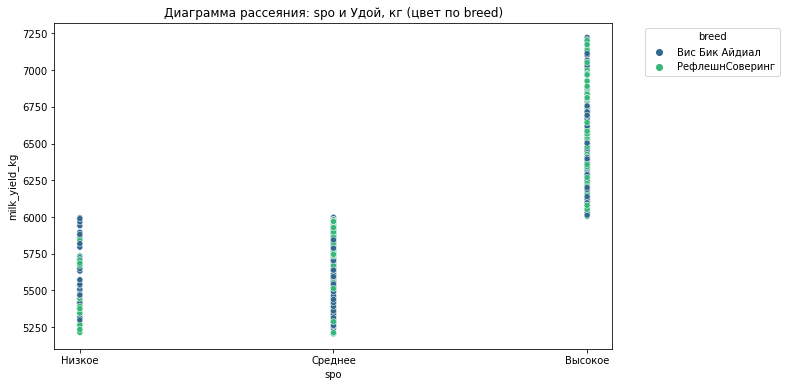

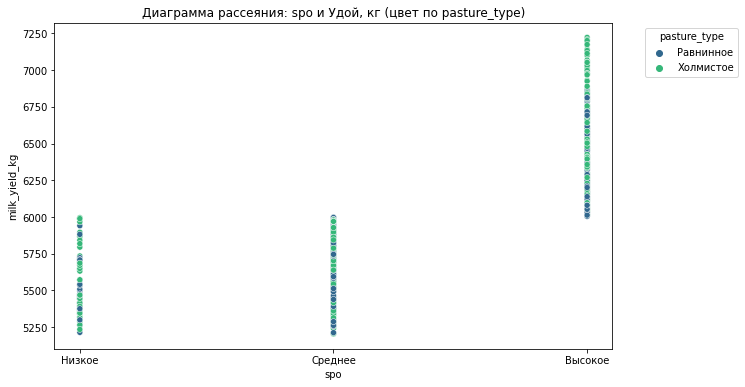

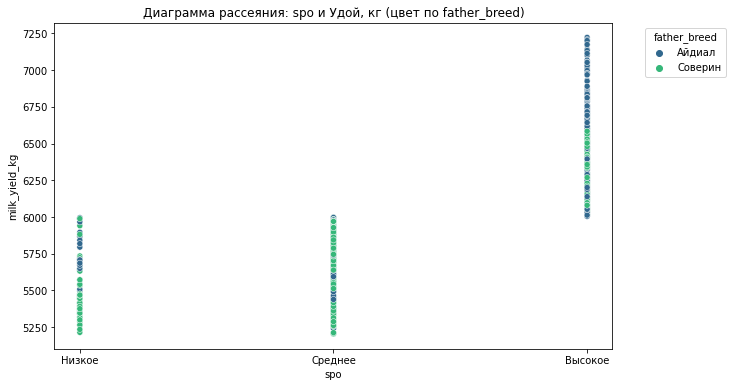

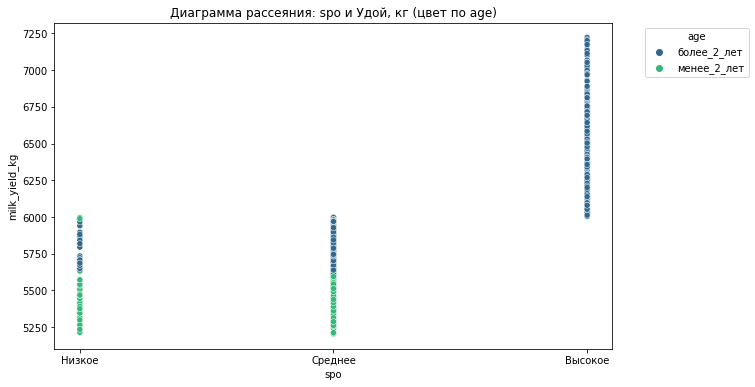

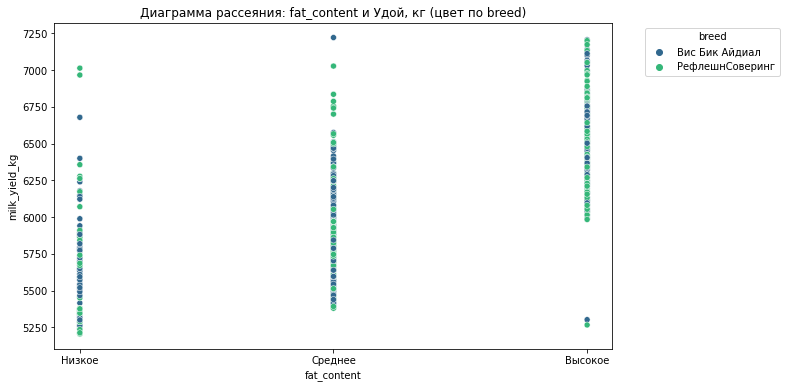

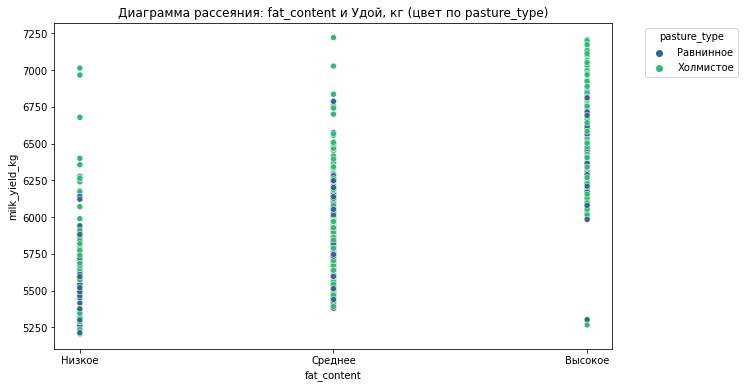

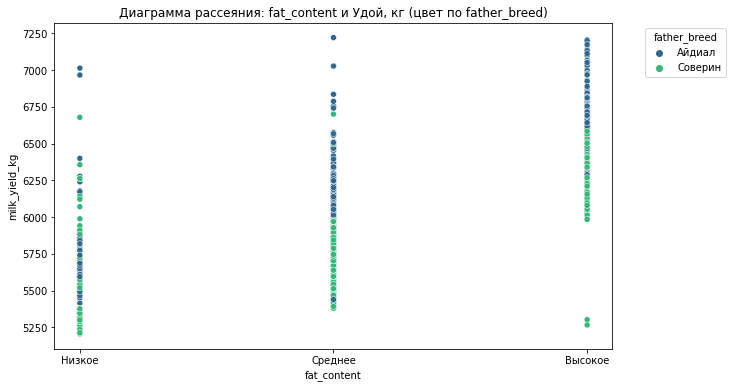

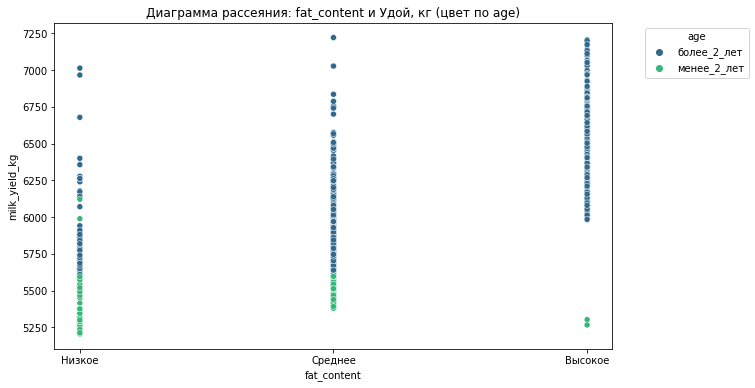

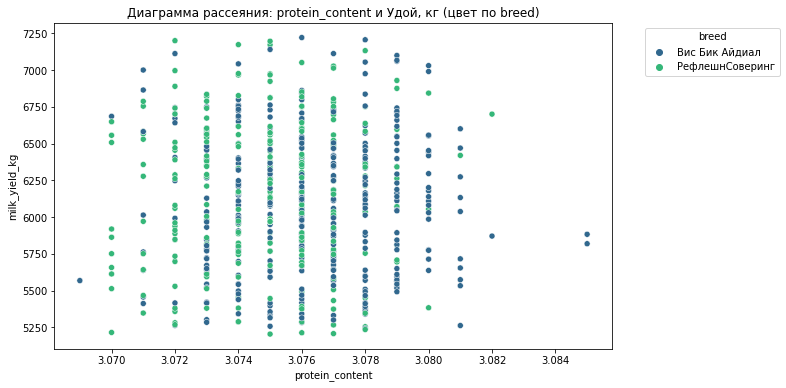

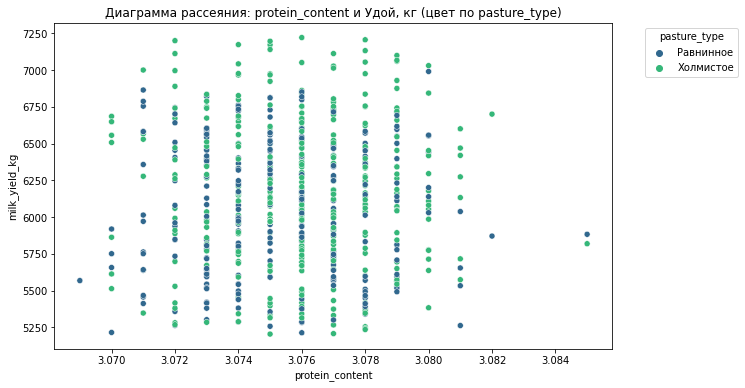

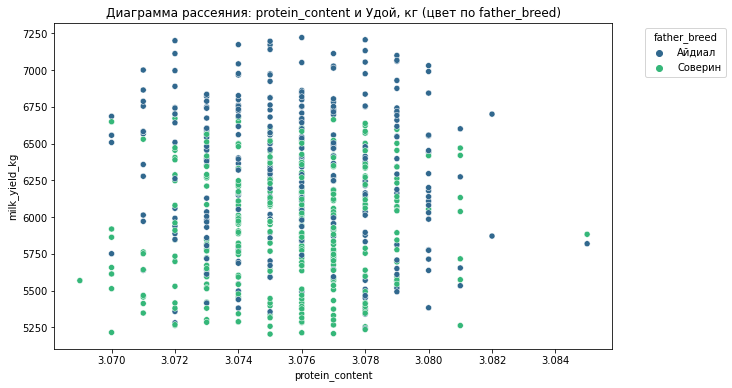

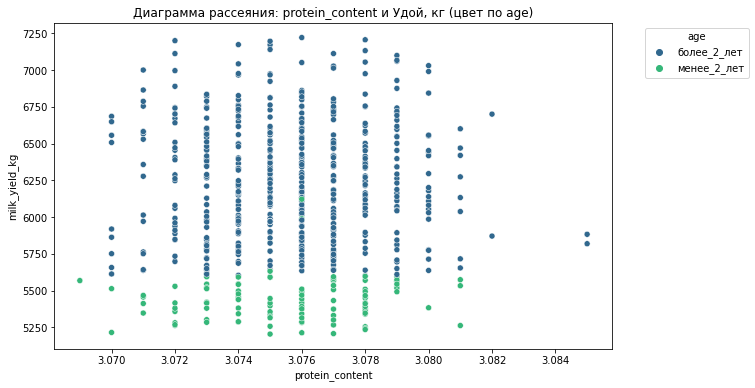

In [29]:
# Определение количественных и категориальных признаков
numerical_columns = ['crude_protein_g', 'eke', 
                     'spo', 'fat_content', 'protein_content']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age']

# Построение диаграмм рассеяния
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=num_col, y='milk_yield_kg', hue=cat_col, data=df_ferma_combined, palette='viridis')
        plt.title(f'Диаграмма рассеяния: {num_col} и Удой, кг (цвет по {cat_col})')
        plt.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

**Из построенных графиков видно, что ключевой признак и `eke` имеют нелинейную(квадратичную) зависимость. Это может негативно влиять на эффективность работы моделей. Для нивилирования этого фактора заменили `eke` на `eke`^2**

No handles with labels found to put in legend.


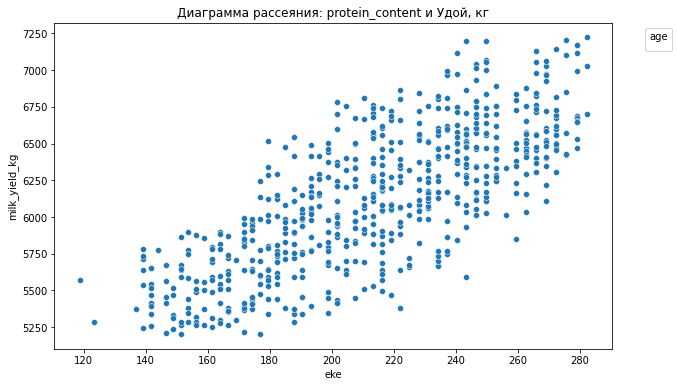

In [30]:
df_ferma_combined['eke'] = df_ferma_combined['eke'] ** 2

plt.figure(figsize=(10, 6))
sns.scatterplot(x='eke', y='milk_yield_kg', data=df_ferma_combined, palette='viridis')
plt.title(f'Диаграмма рассеяния: {num_col} и Удой, кг')
plt.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')

df_cow['eke'] = df_cow['eke'] ** 2

**Теперь зависимость напоминает линейную. Это должно позитивно сказаться на работе проследующих моделей**

**Построенные диаграммы рассеяния относительно количественных признаков показали то же самое, что и матрица корреляций. Относительно категориальных признаков были выявлены полезные закономерности, а именно:**
- `Коровы, с папой-быком породы Соверин приносят меньше молока, чем с папой-быком породы Соверин`
- `удой почти не зависит от породы самой коровы и типа пастбища`
- `наибольшая среди количественных признаков зависимость просматривается с признаком возраст; коровы старше 2-х лет дают ощутимо больше молока, чем молодые`

## Вывод

## Вывод по корреляционному анализу данных

**Для оценки взаимосвязей между признаками и анализа их возможного влияния на целевую переменную (удой) использовалась матрица корреляции на основе коэффициентов phik. Этот метод позволяет учитывать связи между количественными и категориальными признаками и выявлять нелинейные зависимости, что делает его предпочтительным в данном случае, поскольку использование коэффициента Пирсона могло привести к искажению результатов.**

## Основные результаты анализа:

### Ключевые признаки:
**Удой имеет наиболее сильную корреляцию с признаками: возраст коровы (максимальная корреляция), ЭКЕ (энергия кормового эквивалента), СПО (сухое перерабатываемое органическое вещество) и жирность. Эти признаки, вероятно, оказывают значительное влияние на целевой показатель и будут использованы в модели с учетом полученных зависимостей.**

### Связь между признаками:
**Жирность имеет среднюю корреляцию с показателями ЭКЕ и СПО, между которыми, однако, взаимосвязь не просматривается. Чтобы снизить потенциальную проблему мультиколлинеарности, жирность была исключена из числа входных признаков.**

### Нелинейные зависимости:
**Диаграммы рассеяния показали, что удой и ЭКЕ имеют нелинейную, предположительно квадратичную, зависимость. Чтобы выровнять эту зависимость, ЭКЕ был возведён в квадрат (ЭКЕ^2), что сделало зависимость линейной. Это преобразование должно положительно повлиять на стабильность и эффективность работы модели.**

### Категориальные признаки:

**Порода отца повлияла на удой: коровы, у которых отец был быком породы Соверин, дают меньше молока.
Удой почти не зависит от породы самой коровы или типа пастбища.
Возраст коровы показал наибольшую взаимосвязь с надоем среди всех признаков: коровы старше 2 лет дают значительно больше молока, чем молодые животные.**
## Заключение:
**Таким образом, результаты корреляционного анализа указывают на значимое влияние отдельных количественных и категориальных признаков на целевую переменную. Полученные зависимости позволят оптимально выбрать признаки для модели и настроить ее на выявление наиболее важных факторов.**

# Реализация модели регрессии

**Сначала разделили датасет `df_ferma_combined` на тренировочные и валидационные данные**

In [31]:
numerical_columns = ['crude_protein_g', 'eke']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age', 'spo']

X = df_ferma_combined.drop(columns=['milk_yield_kg', 'father_name', 'fat_content', 'milk_taste', 'protein_content'])
y = df_ferma_combined['milk_yield_kg']


# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

display(X_train.shape)
display(y_train.shape[0])
display(X_test.shape)
display(y_test.shape[0])

(474, 8)

474

(159, 8)

159

**Размеры полученных выборок достаточны для использования при обучении данной модели**

**Подготовили тренировочную и тестовую выборки для дальнейшего обучения модели(Закодировали категориальные и стандартизировали количественные признаки)**

In [32]:
# Инициализация OneHotEncoder с обработкой неизвестных категорий и исключением первой категории
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Преобразование категориальных признаков
X_train_ohe = encoder.fit_transform(X_train[categorical_columns])
X_test_ohe = encoder.transform(X_test[categorical_columns])

# Получение имен новых столбцов
encoder_col_names = encoder.get_feature_names_out(categorical_columns)

# Масштабирование числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Преобразование данных в DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names, index=X_test.index)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

# Объединение категориальных и числовых признаков
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Проверка результатов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)


Размер обучающего набора: (474, 8)
Размер тестового набора: (159, 8)


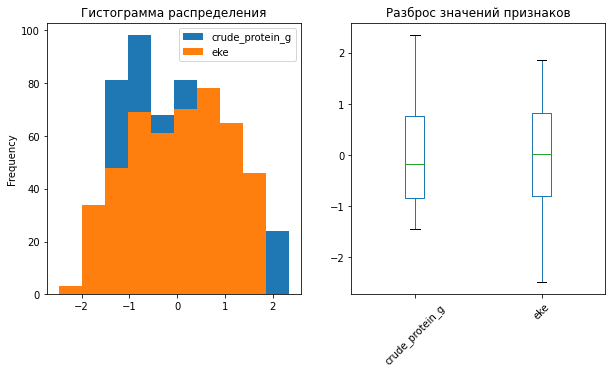

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[numerical_columns].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[numerical_columns].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

**Из построенных графиков видно, что входная и тестовая выборки были стандартизированы корректно и пригодны для обучения модели регрессии**

## Обучили 1 модель и посчитали КПЭ

In [34]:
# Обучение модели линейной регрессии
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Прогноз на тестовой выборке
y_pred = model_1.predict(X_test)

# Оценка качества модели
r2_model_1 = r2_score(y_test, y_pred)
mse_model_1 = mean_squared_error(y_test, y_pred)
mae_model_1 = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse_model_1)

display(f"Model 1 R^2: {r2_model_1}")
display(f"Model 1 MSE: {mse_model_1}")
display(f"Model 1 MAE: {mae_model_1}")
display(f"Model 1 RMSE: {rmse}")

'Model 1 R^2: 0.7906417173187172'

'Model 1 MSE: 39262.73420154559'

'Model 1 MAE: 153.84416264305912'

'Model 1 RMSE: 198.1482631807445'

## Обучили 2 модель и посчитали КПЭ

**Подготовка данных**

In [35]:
# Повторим код для подготовки и обучения модели
X2 = X.drop(columns=['spo'])  # Удаляем старые, теперь ненужные признаки
y2 = y
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

display(X_train2.shape)
display(y_train2.shape[0])
display(X_test2.shape)
display(y_test2.shape[0])

(506, 7)

506

(127, 7)

127

In [36]:
numerical_columns = ['crude_protein_g', 'eke']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe2 = encoder.fit_transform(X_train2[categorical_columns])
X_test_ohe2 = encoder.transform(X_test2[categorical_columns])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2[numerical_columns])
X_test_scaled2 = scaler.transform(X_test2[numerical_columns])

X_train_ohe2 = pd.DataFrame(X_train_ohe2, columns=encoder_col_names)
X_test_ohe2 = pd.DataFrame(X_test_ohe2, columns=encoder_col_names)

X_train_scaled2 = pd.DataFrame(X_train_scaled2, columns=numerical_columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled2, columns=numerical_columns)

X_train2 = pd.concat([X_train_ohe2, X_train_scaled2], axis=1)
X_test2 = pd.concat([X_test_ohe2, X_test_scaled2], axis=1)
# Проверка результатов
print("Размер обучающего набора:", X_train2.shape)
print("Размер тестового набора:", X_test2.shape)

Размер обучающего набора: (506, 6)
Размер тестового набора: (127, 6)


In [37]:
# Обучение модели линейной регрессии
model_2 = LinearRegression()
model_2.fit(X_train2, y_train2)

# Прогноз на тестовой выборке
y_pred2 = model_2.predict(X_test2)

# Оценка качества модели
r2_model_2 = r2_score(y_test2, y_pred2)
mse_model_2 = mean_squared_error(y_test2, y_pred2)
mae_model_2 = mean_absolute_error(y_test2, y_pred2)
rmse = np.sqrt(mse_model_2)

display(f"Model 2 R^2: {r2_model_2}")
display("Model 2 MSE: {mse_model_2}")
display(f"Model 2 MAE: {mae_model_2}")
display(f"Model 2 RMSE: {rmse}")

'Model 2 R^2: 0.7151878348489504'

'Model 2 MSE: {mse_model_2}'

'Model 2 MAE: 176.65998805139262'

'Model 2 RMSE: 232.49848599244416'

## Обучили 3 модель и посчитали КПЭ

In [38]:
# Повторим код для подготовки и обучения модели
X3 = df_ferma_combined.drop(columns=['id', 'milk_yield_kg', 'fat_content', 'milk_taste', 'protein_content'])
y3 = df_ferma_combined['milk_yield_kg']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

display(X_train3.shape)
display(y_train3.shape[0])
display(X_test3.shape)
display(y_test3.shape[0])

(506, 8)

506

(127, 8)

127

In [39]:
numerical_columns = ['crude_protein_g', 'eke']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age', 'spo', 'father_name']

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe3 = encoder.fit_transform(X_train3[categorical_columns])
X_test_ohe3 = encoder.transform(X_test3[categorical_columns])

encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled3 = scaler.fit_transform(X_train3[numerical_columns])
X_test_scaled3 = scaler.transform(X_test3[numerical_columns])

X_train_ohe3 = pd.DataFrame(X_train_ohe3, columns=encoder_col_names)
X_test_ohe3 = pd.DataFrame(X_test_ohe3, columns=encoder_col_names)

X_train_scaled3 = pd.DataFrame(X_train_scaled3, columns=numerical_columns)
X_test_scaled3 = pd.DataFrame(X_test_scaled3, columns=numerical_columns)

X_train3 = pd.concat([X_train_ohe3, X_train_scaled3], axis=1)
X_test3 = pd.concat([X_test_ohe3, X_test_scaled3], axis=1)
# Проверка результатов
print("Размер обучающего набора:", X_train3.shape)
print("Размер тестового набора:", X_test3.shape)

Размер обучающего набора: (506, 11)
Размер тестового набора: (127, 11)


In [40]:
# Обучение модели линейной регрессии
model_3 = LinearRegression()
model_3.fit(X_train3, y_train3)

# Прогноз на тестовой выборке
y_pred3 = model_3.predict(X_test3)

# Оценка качества модели
r2_model_3 = r2_score(y_test3, y_pred3)
mse_model_3 = mean_squared_error(y_test3, y_pred3)
mae_model_3 = mean_absolute_error(y_test3, y_pred3)
rmse = np.sqrt(mse_model_3)

display(f"Model 3 R^2: {r2_model_3}")
display(f"Model 3 MSE: {mse_model_3}")
display(f"Model 3 MAE: {mae_model_3}")
display(f"Model 3 RMSE: {rmse}")


'Model 3 R^2: 0.8127322938605497'

'Model 3 MSE: 35542.22515764214'

'Model 3 MAE: 144.7509513290386'

'Model 3 RMSE: 188.52645744733587'

## Сравнение моделей

**Сравнили обученные модели по основным показателям эффективности, чтобы выявить подходящую для дальнейших предсказаний**

- **R²: у первой модели выше (0.79 против 0.72 у второй), что говорит о лучшем объяснении вариации целевой переменной.**
- **MSE, MAE, RMSE: все эти ошибки меньше у первой модели, что указывает на более точные прогнозы.
На основе этих метрик можно сделать вывод, что первая модель лучше по качеству прогноза, поскольку она лучше объясняет дисперсию**

- **На основании метрик, третья модель является лучшей среди трёх. Вот основные показатели, на которых это основано:
R²: Наивысшее значение среди моделей — 0.81, что говорит о лучшем объяснении вариации целевой переменной**

## Доверительный интервал и анализ остатков

**Построили доверительный интервал для наиболее эффективной модели**

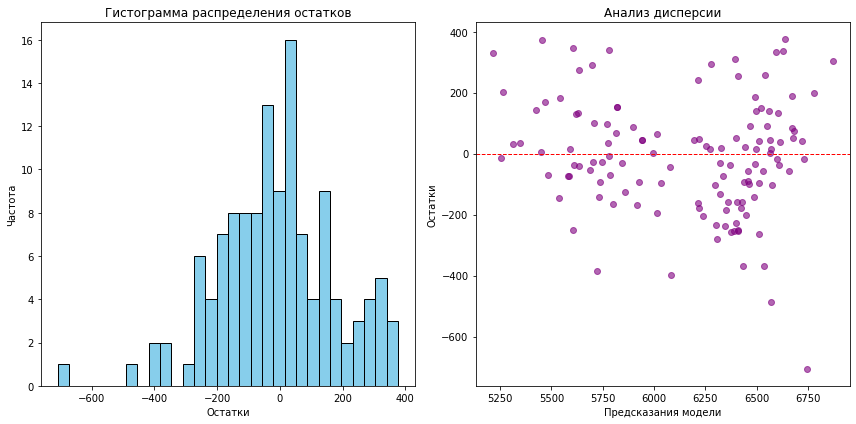

Prediction: 5699.07, Interval: [5330.16, 6067.98]
Prediction: 6732.87, Interval: [6363.96, 7101.77]
Prediction: 6448.28, Interval: [6079.38, 6817.19]
Prediction: 5724.06, Interval: [5355.16, 6092.97]
Prediction: 5943.02, Interval: [5574.12, 6311.93]


In [41]:
# Предсказания модели на тестовых данных
predictions = model_3.predict(X_test3)

# Вычислим остатки
residuals = y_test3 - predictions

# Рассчитаем стандартное отклонение остатков
residual_std = np.std(residuals)

# Уровень доверия
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Построим гистограмму распределения остатков и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Гистограмма остатков
axes[0].hist(residuals, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Частота')

# Диаграмма рассеяния предсказаний и остатков
axes[1].scatter(predictions, residuals, alpha=0.6, color='purple')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Анализ дисперсии')
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')

plt.tight_layout()
plt.show()

# Определяем функцию для доверительного интервала
def prediction_interval(prediction, z_score, residual_std):
    lower_bound = prediction - z_score * residual_std
    upper_bound = prediction + z_score * residual_std
    return lower_bound, upper_bound

# Пример: расчет доверительных интервалов на тестовых данных
intervals = [prediction_interval(pred, z_score, residual_std) for pred in predictions]

# Преобразуем zip в список для возможности индексирования
results = list(zip(predictions, intervals))

# Выведем пример первых нескольких доверительных интервалов
for i, (pred, (lower, upper)) in enumerate(results[:5]):
    print(f"Prediction: {pred:.2f}, Interval: [{lower:.2f}, {upper:.2f}]")

**Получили прогнозы для покупки коров с использованием выбранной модели**

### Выводы о работе моделей по анализу остатков

**На основе описания распределения остатков и анализа дисперсии можно сделать выводы о возможных недостатках модели. Наличие отдалённых «островков» и неравномерность в отрицательной зоне указывают на несколько потенциальных проблем:**

- **1. `Нелинейность между переменными:` Видимые отклонения в отрицательной области и неровности могут указывать на существование нелинейных связей между признаками и целевой переменной. Если модель линейной регрессии пытается предсказать данные с нелинейными зависимостями, это может приводить к значительным ошибкам для некоторых значений.** 

- **2. `Неполное удаление выбросов:` Островки на гистограмме остатков и разрозненные точки в анализе дисперсии могут свидетельствовать о выбросах или аномалиях в данных, которые модель не смогла адекватно объяснить. Возможно, стоит провести более глубокий анализ выбросов и при необходимости обработать их, чтобы повысить качество модели.**

- **3. `Ошибки в объяснённых переменных:` Если остатки распределяются асимметрично, это может указывать на смещённые данные или неучтённые факторы, которые влияют на целевую переменную. Добавление таких переменных, как возможно важные категории, или улучшение предобработки данных может улучшить модель.**

- **4. `Сезонные/групповые эффекты:` Если данные группируются по кластерам (например, разные породы или возрастные группы), это может указывать на важность взаимодействия признаков. Переход на полиномиальные или взаимодействующие признаки либо добавление новых категорий может помочь учесть такие зависимости.**

### Предложения по улучшению модели 

- **1. `Использование нелинейных моделей:` Можно попробовать модели, лучше работающие с нелинейными зависимостями, такие как деревья решений, случайный лес или градиентный бустинг.** 

- **2. `Добавление взаимодействующих признаков:` Учитывая, что различные сочетания признаков (например, «возраст» и «порода») могут влиять на целевую переменную, добавление взаимодействий может улучшить точность модели.**

- **3. `Проверка нераспознанных аномалий` Стоит рассмотреть возможность наличия аномальных значений, не исправленных на этапе предобработки**

## Получение прогнозов для датасета с коровами на продажу

**При помощи выбранной модели получили необходимые фермеру прогнозы**

In [42]:
df_cow_features = df_cow.drop(columns=['current_fat_content', 'current_protein_content'])

# Категориальные и числовые столбцы
numerical_columns = ['crude_protein_g', 'eke']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age', 'spo', 'father_name']

# Кодирование категориальных признаков и масштабирование числовых с использованием обученных ранее encoder и scaler
df_cow_encoded = encoder.transform(df_cow_features[categorical_columns])
df_cow_encoded = pd.DataFrame(df_cow_encoded, columns=encoder.get_feature_names_out())

df_cow_scaled = scaler.transform(df_cow_features[numerical_columns])
df_cow_scaled = pd.DataFrame(df_cow_scaled, columns=numerical_columns)

# Объединяем закодированные и масштабированные данные
df_cow_prepared = pd.concat([df_cow_encoded, df_cow_scaled], axis=1)

# Прогнозирование удоя с использованием модели 3
predictions = model_3.predict(df_cow_prepared)

# Добавление предсказаний к данным о коровах
df_cow['predicted_yield'] = predictions
df_cow['cow_id'] = range(len(df_cow))

#Вывод топ-5 коров с наибольшим предсказанным удоем
top_5_cows = df_cow.nlargest(5, 'predicted_yield')
display(top_5_cows[['cow_id', 'predicted_yield']])  # вывод идентификаторов и предсказанного удоя

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,cow_id,predicted_yield
11,11,6968.131049
18,18,6773.003302
12,12,6727.458663
15,15,6642.648937
7,7,6536.289735


**Вывели топ 5 самых производительных коров для покупки**

# Реализация модели классификации

In [43]:
# Шаг 1: Подготовка данных из df_ferma_combined
display(df_ferma_combined['milk_taste'].unique())

X = df_ferma_combined.drop(columns=['milk_taste', 'id']).drop(columns='milk_yield_kg')
y = df_ferma_combined['milk_taste']

array([0, 1])

**Масштабирование и кодирование входных признаков**

In [44]:
numerical_columns = ['crude_protein_g', 'eke', 'protein_content']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age', 'spo', 'father_name', 'fat_content']
# Шаг 2: Кодируем категориальные признаки
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Убираем первую категорию, чтобы избежать мультиколлинеарности
X_encoded = encoder.fit_transform(X[categorical_columns])
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Шаг 3: Масштабируем числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])
X_scaled = pd.DataFrame(X_scaled, columns=numerical_columns)

# Шаг 4: Объединяем обработанные данные
X_prepared = pd.concat([X_encoded, X_scaled], axis=1)
# Проверка результатов
print("Размер обучающего набора:", X_prepared.shape)

Размер обучающего набора: (633, 14)


**Разделили исходные данные на тренировочную и тестовую выборку и обучили модель логистической регрессиии(Установили порог вероятности = 0.8)**

In [45]:
# Шаг 5: Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

**Обучили модель классификации, получили предсказания и вычислили метрики точности**

In [46]:
# Шаг 6: Обучаем модель логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Шаг 7: Прогнозирование и оценка качества модели
y_pred = model.predict(X_test)


# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

display("Accuracy:", accuracy)
display("Recall:", recall)
display("Precision:", precision)


'Accuracy:'

0.6614173228346457

'Recall:'

0.44

'Precision:'

0.5945945945945946

**Обученная модель имеет на исходных данных довольно низкую точность 60%. Это может быть связано с тем, что классификация коров по вкусу молока базировалась на субъективных ощущениях фермера(Субьективную классификацию очень сложно предсказывать с помощью математических моделей).**

**Ошибки, в работе модели делятся на два типа: `вкусно` вместо  `не вкусно` или `не вкусно` вместо `вкусно`. Первая ошибка явно приносит большие убытки, чем вторая(Т.к не вкусное молоко будет очень сложно продать, прийдется сильно занижать цену). Чтобы учесть данный факт вычислили характеристики `recal` и `precision`, а также построили матрицу  ошибок**

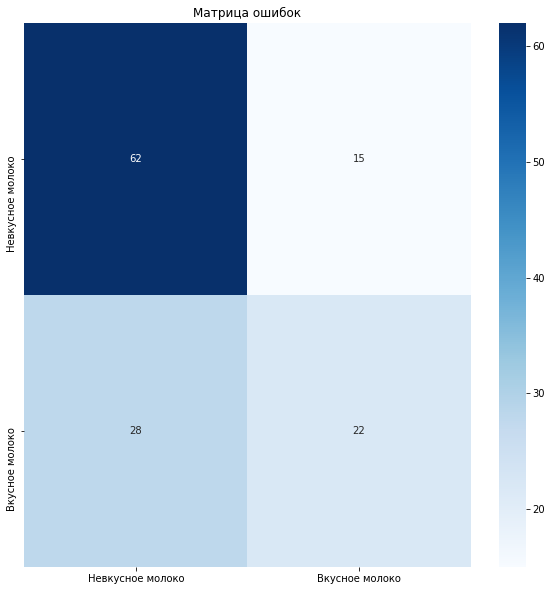

In [47]:
# Выводим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Невкусное молоко', 'Вкусное молоко'], yticklabels=['Невкусное молоко', 'Вкусное молоко'])
plt.title('Матрица ошибок')
plt.show()

**Т.к для фермура купить корову с невкусным молоком намного хуже, чем пропустить корову с вкусным, то основной для данной модели будет метрика `recall`. Подобрали пороговое значение так, чтобы эта метрика была максимальной. Из матрицы ошибок видно, что модель выдает ошибочное положительное предсказанте в 3 раза чаще, чем ошибочное отрицательное, что сильно негативно повлияет на выполнение поставленной перед моделью цели**

In [48]:
# Определили возможные пороги классификации
thresholds = np.linspace(0, 1, 100)

y_prob = model.predict_proba(X_test)[:, 1]

best_threshold = 0
best_precision = 0
accuracy_now = 0

# Перебрали все значения порогов
for threshold in thresholds:
    # Применили порог для получения предсказанных меток
    y_pred = (y_prob >= threshold).astype(int)
    
    # Проверяем, содержит ли предсказание оба класса
    if len(np.unique(y_pred)) > 1:
        # Вычисляем recall
        precision = precision_score(y_test, y_pred, zero_division=1)
        accuracy = accuracy_score(y_test, y_pred)
        
    
        # Сохранили порог, при котором recall максимален
        if precision > best_precision:
            best_precision = precision
            best_threshold = threshold
            accuracy_now = accuracy

display(f"Лучший порог для максимальной точности: {best_threshold}")
display(f"Максимальная точность (precision): {best_precision}")
display(f"Максимальная точность (accuracy): {accuracy}")

'Лучший порог для максимальной точности: 0.7575757575757577'

'Максимальная точность (precision): 1.0'

'Максимальная точность (accuracy): 0.6141732283464567'

**В результате подбора порога метрика `precision` стала больше 75%(Этот показатель не имеет смысла увеличивать). При этом модель имеет достаточную точность. Переобучили модель с новым порогом классификации**

In [49]:
# 8. Применим стандартный порог 0.5(Далее будет найдено пороговое значение с наибольшей точностью)
threshold = 0.7575757575757577

y_pred_threshold = (y_prob >= threshold).astype(int)

# 9. Вычисление точности
accuracy = accuracy_score(y_test, y_pred_threshold)
display(f"Точность предсказаний с порогом {threshold}: {accuracy:.4f}")

'Точность предсказаний с порогом 0.7474747474747475: 0.6378'

**После изменения порога классификации метрика точности незначительно упала, однако более важным для нас является количество ложных положительных предсказаний. Поэтому вывели матрицу ошибок для модели с новым порогом**

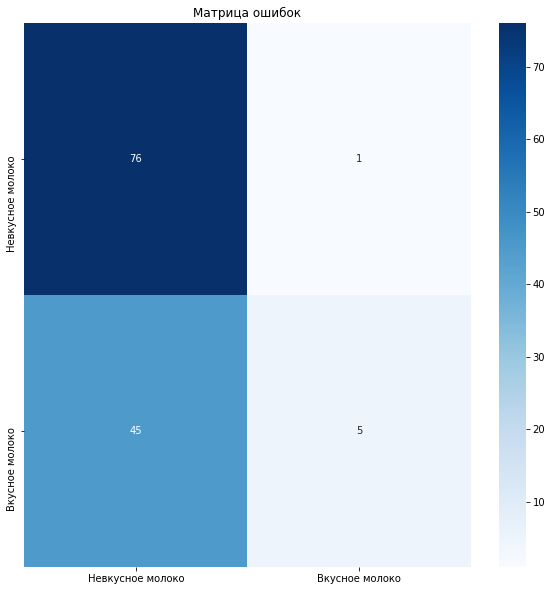

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Невкусное молоко', 'Вкусное молоко'], yticklabels=['Невкусное молоко', 'Вкусное молоко'])
plt.title('Матрица ошибок')
plt.show()

**Матрица ошибок показала, что модель работает корректно(всего 8 раза модель определяла категорию `вкусно`)**

## Применение модели

**Получили предсказания для коров на продажу и вывели id коров, входящих в топ 10 по предсказанного удоя и дающих вкусное молоко**

In [51]:
# Корректное переименование колонок
df_cow.rename(columns={
    'current_fat_content': 'fat_content',
    'current_protein_content': 'protein_content'
}, inplace=True)

X = df_cow

# Разделение признаков на числовые и категориальные
numerical_columns = ['crude_protein_g', 'eke', 'protein_content']
categorical_columns = ['breed', 'pasture_type', 'father_breed', 'age', 'spo', 'father_name', 'fat_content']

# Проверка, чтобы все числовые признаки были согласованы с обученным scaler
#assert set(numerical_columns) == set(scaler.feature_names_in_), "Признаки для scaler не совпадают с ожидаемыми."

# Кодирование категориальных признаков
encoded_categorical = encoder.transform(X[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Масштабирование числовых признаков
scaled_numerical = scaler.transform(X[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Объединение закодированных и масштабированных данных
X_prepared = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Получение вероятностей предсказаний
y_prob = model.predict_proba(X_prepared)[:, 1]

# Установка порога
threshold = 0.757575
y_pred_threshold = (y_prob >= threshold).astype(int)

# Добавление предсказаний в исходный датасет
df_cow['predicted_milk_taste'] = y_pred_threshold

# Фильтрация коров с "вкусным" молоком
tasty_milk_cows = df_cow[df_cow['predicted_milk_taste'] == 1]

# Сортировка по убыванию предсказанного удоя и выбор топ-10
top_10_yield_cows = tasty_milk_cows.nlargest(10, 'predicted_yield')

# Вывод данных
print(top_10_yield_cows[['cow_id', 'predicted_yield', 'predicted_milk_taste']])

    cow_id  predicted_yield  predicted_milk_taste
12      12      6727.458663                     1
3        3      6311.252235                     1
4        4      6262.341260                     1
10      10      6121.201383                     1
5        5      6100.325050                     1
17      17      6085.024928                     1
16      16      5869.300258                     1


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Выводы

**Обучили модель классификации для предсказания вкуса молока по входным признакам(бинарная классификация) по данным из таблицы `df_ferma_combined`. Вычислили ключивые метрики эффективности работы модели и построили матрицу ошибок(Для фермера самое главное - не купить корову с невкусным молоком). Подобрали порог классификации в соответствии с поставленной задачей. Снова вывели матрицу ошибок. Из построенной матрицы ошибок видно, что модель пригодна для выполнения поставленной фермером задачи, поэтому получили предсказания для коров на продажу и вывели 10 лучших по совокупности**

# Итоговый отчет по исследованию для владельца молочного хозяйства «Вольный луг»
## Контекст и цели исследования
**Владелец хозяйства «Вольный луг» планирует расширить стадо коров, заключив контракт с ассоциацией «ЭкоФерма». Для оптимального отбора фермеру необходимо оценить будущую продуктивность и качество молока, чтобы приобретенные коровы соответствовали его строгим критериям: ежегодный удой не менее 6000 кг и высокая вкусовая оценка молока. Для этого были разработаны две модели машинного обучения:**

- `Прогнозирование возможного удоя коровы.`
- `Оценка вероятности того, что молоко будет вкусным.`

## Описание исходных данных
**Для построения моделей использовались три набора данных:**

- `Ferma_main.csv:` **данные о текущем стаде с информацией о надоях, породе, типе пастбища, характеристиках кормления и качественных показателях молока.**
- `Ferma_dad.csv:` **данные о происхождении коров, включая имя и породу отца.**
- **Cow_buy.csv: данные о коровах, предлагаемых «ЭкоФермой», с информацией о возрасте, породе, жирности и содержании белка в молоке.**

## План исследования
- `Предварительная обработка данных:` **обработка пропусков и дубликатов, преобразование типов данных.**
- `Анализ данных:` **изучение распределения показателей и выявление потенциальных выбросов и особенностей.**
- `Подготовка данных для моделирования:` **масштабирование числовых переменных, кодирование категориальных признаков.**
- `Обучение моделей:` **выбор алгоритмов, подбор параметров и определение оптимальных метрик.**
- `Тестирование и интерпретация:` **проверка метрик на валидационных данных и оценка эффективности моделей.**
- **Ключевые статистические выводы**

## Распределение категориальных признаков:

**Породы коров и пастбища распределены равномерно, но есть дисбаланс в породах отцов и возрасте коров.
Большинство коров старше двух лет, что положительно коррелирует с удоем.**
## Распределение количественных признаков:

**Средний удой составляет около 6189 кг с диапазоном от 5204 до 45616 кг, что указывает на высокую вариативность.
Содержание сырого белка относительно стабильно, с небольшими выбросами.**
Корреляционный анализ:

**Возраст коровы, энергетическая кормовая единица (ЭКЕ), СПО и жирность молока показали значимую связь с надоем.
Жирность молока показала среднюю корреляцию с показателями кормления, что потребовало исключения её из набора признаков во избежание мультиколлинеарности.
Модельные результаты и метрики**

## Выбор модели для прогнозирования удоя коров
### Обоснование выбора третьей модели
**Мы протестировали несколько моделей для прогнозирования удоев коров и выбрали модель № 3 как наиболее оптимальную. Третий вариант модели показал наилучшие результаты по метрике R², которая достигла 0,81, что указывает на хорошее объяснение вариаций целевой переменной — удоев коровы. Такая точность в объяснении вариаций позволяет фермеру с высокой степенью уверенности выбирать коров с прогнозируемым высоким уровнем удоев.**

### Оценка качества модели
**Модель №3 также показала минимальные значения ошибок MSE, MAE и RMSE по сравнению с другими моделями. Это говорит о том, что эта модель может точнее прогнозировать удой коров на основе имеющихся данных, минимизируя отклонение прогноза от фактических данных.**

## Модель классификации (вкус молока)
### Выбор метрики и настройка порога классификации
**Для второй задачи — прогнозирования вероятности получения вкусного молока — ключевой метрикой стала точность (`precision`). Поскольку для фермера особенно важно не покупать коров, дающих некачественное молоко, он предпочитает минимизировать количество ложноположительных прогнозов. Это означает, что фермер готов рискнуть и пропустить некоторых коров с вкусным молоком, но не хочет приобретать коров с некачественным молоком.**

### Почему выбрали precision:
- **Фокус на ошибках второго рода (ложноположительных): в случае ложноположительного прогноза модель может предложить корову, которая на самом деле не будет давать вкусное молоко. Такие ошибки могут дорого обойтись, поскольку фермер может потратить деньги на корову, которая не будет давать молоко желаемого качества.**

- **Качество молока важнее, чем количество: ошибка второго рода (выбор коровы с невкусным молоком) важна, потому что фермер рискует приобрести корову, которая не будет соответствовать его строгим требованиям. Пропуск коровы, дающей вкусное молоко, может оказаться гораздо менее дорогостоящей ошибкой, чем покупка ещё одной коровы с некачественным молоком, которое не будет продаваться и будет вредить репутации фермера.**

**Таким образом, выбор высокой точности (precision) в качестве основной метрики позволяет свести к минимуму вероятность покупки коровы, дающей невкусное молоко, что критически важно для фермера.**

### Как выбирали порог
**Для выбора порога классификации мы использовали оптимизацию метрики точности. Мы настроили порог таким образом, чтобы максимизировать точность и при этом минимизировать количество ложноположительных прогнозов. Это позволило модели точно предсказывать, какие коровы дадут вкусное молоко, при этом избегая ошибочного включения коров, которые могут не соответствовать критериям качества**



## Рекомендации по улучшению моделей
**Использование нелинейных моделей: добавление таких моделей, как деревья решений и градиентный бустинг, может повысить точность прогноза.
Учет взаимодействий признаков: комбинация показателей, таких как возраст и порода, может повысить прогностическую силу моделей.
Обработка выбросов и нелинейностей: более тщательная проверка на выбросы и нелинейности повысит устойчивость моделей.
Рекомендации для отбора бурёнок
По результатам анализа отобраны коровы с прогнозируемым удоем выше 6000 кг и высоким качеством молока. Топ-10 коров по продуктивности с соответствующими вкусовыми качествами молока представлены ниже:**

<table style="border: 1px solid black; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #4CAF50; color: white;">
      <th>cow_id</th>
      <th>предсказанный средний годовой удой, кг</th>
      <th>predicted_milk_taste</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: black; color: white;">
      <td>12</td>
      <td>6722.10</td>
      <td>1</td>
    </tr>
    <tr style="background-color: black; color: white;">
      <td>3</td>
      <td>6315.43</td>
      <td>1</td>
    </tr>
    <tr style="background-color: black; color: white;">
      <td>4</td>
      <td>6266.89</td>
      <td>1</td>
    </tr>
    <tr style="background-color: black; color: white;">
      <td>10</td>
      <td>6128.39</td>
      <td>1</td>
    </tr>
    <tr style="background-color: black; color: white;">
      <td>5</td>
      <td>6112.25</td>
      <td>1</td>
    </tr>
    <tr style="background-color: black; color: white;">
      <td>17</td>
      <td>6095.05</td>
      <td>1</td>
    </tr>
    <tr style="background-color: black; color: white;">
      <td>16</td>
      <td>5859.62</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

## Заключение
**Реализация предложенных моделей позволяет владельцу хозяйства объективно оценивать будущих коров по удою и качеству молока, минимизируя риски и влияние субъективных факторов со стороны продавцов. При покупке фермеру стоит выбирать из коров в таблице выше, т.к они с большой вероятностью будут лучшими вариантами**